# Complete Linear Regression Tutorial: From Data to Model Evaluation

## 📚 Learning Objectives

In this comprehensive tutorial, you will learn:

1. **Python Foundations**: Working with pandas, numpy, and data manipulation
2. **Data Visualization**: Creating insightful visualizations with matplotlib and seaborn
3. **Feature Engineering**: Creating and transforming features for better model performance
4. **Simple Linear Regression**: Building and evaluating single-variable regression models
5. **Multiple Linear Regression**: Building and evaluating multi-variable regression models
6. **Model Evaluation**: Understanding and calculating RMSE, MSE, MAE, and R² metrics

---

## 📊 Dataset: California Housing Prices

We'll use the **California Housing Dataset**, which contains information about housing prices in California districts. This is a classic dataset for regression tasks.

**Features:**
- MedInc: Median income in block group
- HouseAge: Median house age in block group
- AveRooms: Average number of rooms per household
- AveBedrms: Average number of bedrooms per household
- Population: Block group population
- AveOccup: Average number of household members
- Latitude: Block group latitude
- Longitude: Block group longitude

**Target Variable:**
- MedHouseVal: Median house value (in $100,000s)


---
## 1. Importing Required Libraries

Let's start by importing all the necessary Python libraries for our analysis.


In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Settings for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


---
## 2. Loading and Exploring the Dataset

### 2.1 Load the Data


In [ ]:
# Load California Housing Dataset
housing = fetch_california_housing(as_frame=True)

# Create a DataFrame with features and target
df = housing.frame

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1] - 1}")


Dataset loaded successfully!
Shape: (20640, 9)
Number of samples: 20,640
Number of features: 8


### 2.2 First Look at the Data


In [ ]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


### 2.3 Data Information and Statistics


In [ ]:
# Dataset information
print("Dataset Information:")
print("=" * 50)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Statistical summary
print("\nStatistical Summary:")
print("=" * 50)
df.describe()



Statistical Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
# Check for missing values
print("\nMissing Values:")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")



Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Total missing values: 0


---
## 3. Exploratory Data Analysis (EDA) and Visualization

### 3.1 Target Variable Distribution


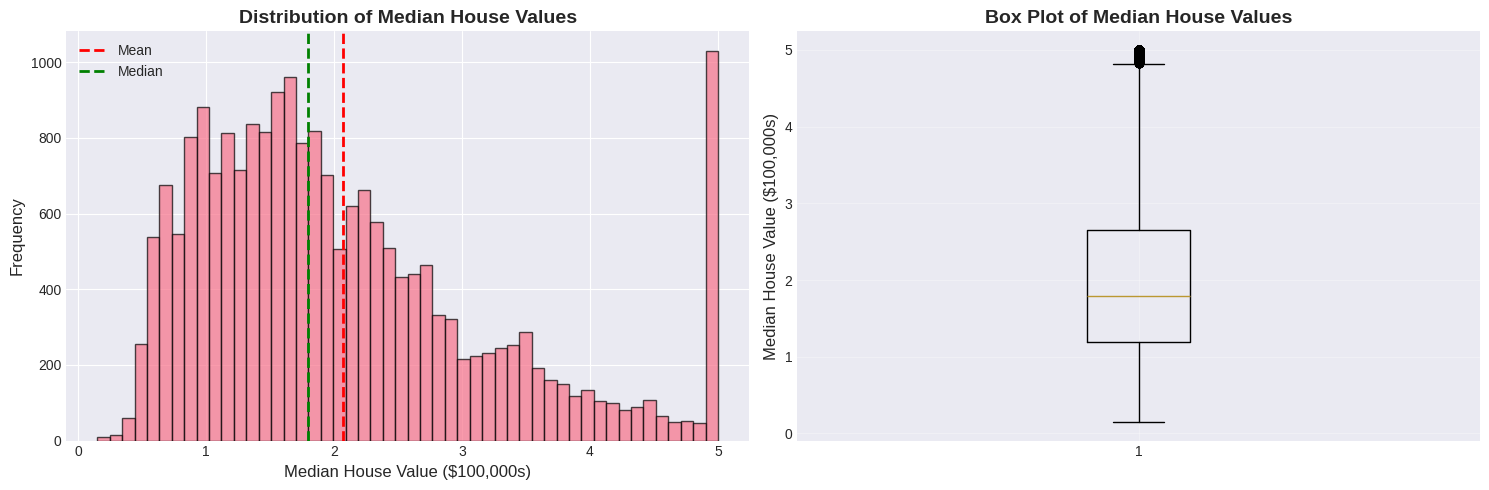

Mean House Value: $2.07 (×$100,000)
Median House Value: $1.80 (×$100,000)
Std Dev: $1.15 (×$100,000)


In [ ]:
# Distribution of target variable (Median House Value)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['MedHouseVal'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Median House Value ($100,000s)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Median House Values', fontsize=14, fontweight='bold')
axes[0].axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['MedHouseVal'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()

# Box plot
axes[1].boxplot(df['MedHouseVal'], vert=True)
axes[1].set_ylabel('Median House Value ($100,000s)', fontsize=12)
axes[1].set_title('Box Plot of Median House Values', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean House Value: ${df['MedHouseVal'].mean():.2f} (×$100,000)")
print(f"Median House Value: ${df['MedHouseVal'].median():.2f} (×$100,000)")
print(f"Std Dev: ${df['MedHouseVal'].std():.2f} (×$100,000)")


### 3.2 Feature Distributions


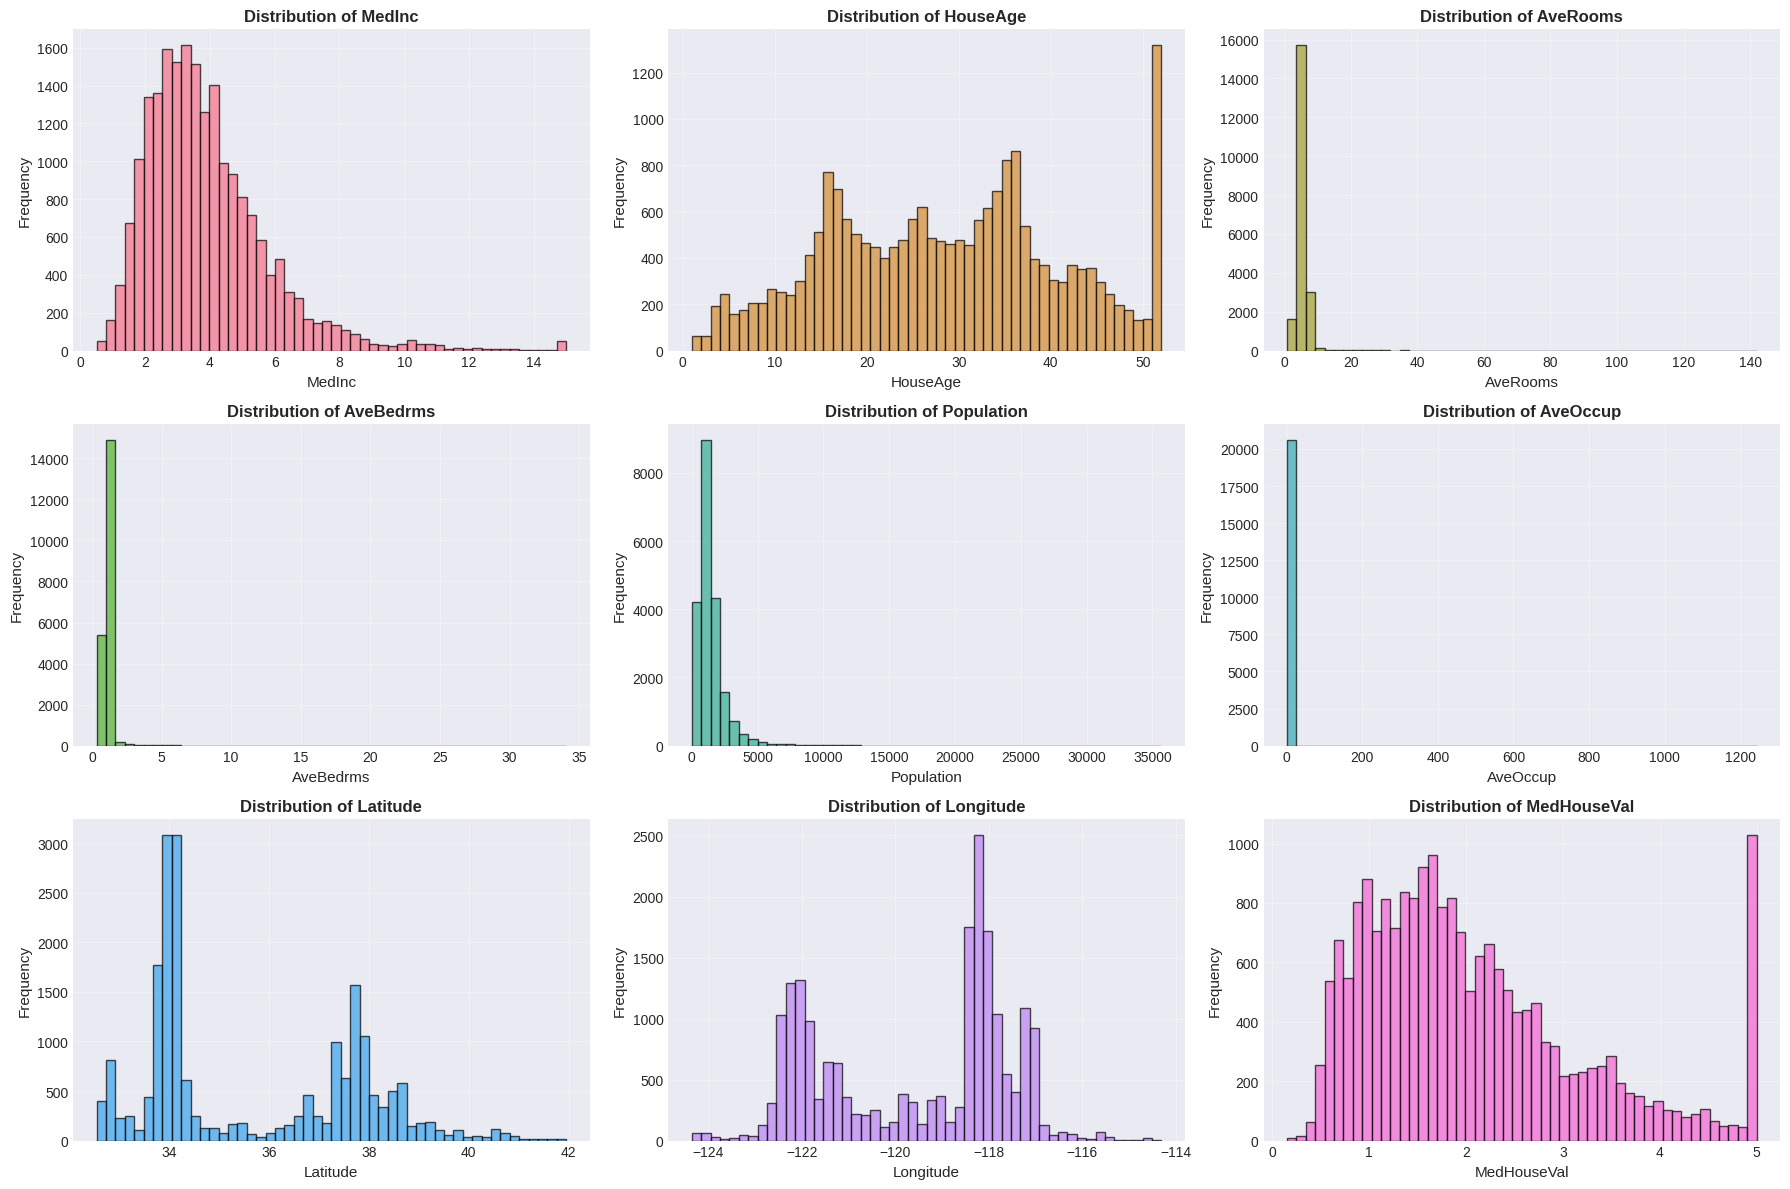

In [ ]:
# Distribution of all features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

# Generate a color palette with enough colors for all columns
num_columns = len(df.columns)
colors = sns.color_palette('husl', num_columns)

for idx, column in enumerate(df.columns):
    axes[idx].hist(df[column], bins=50, edgecolor='black', alpha=0.7, color=colors[idx])
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

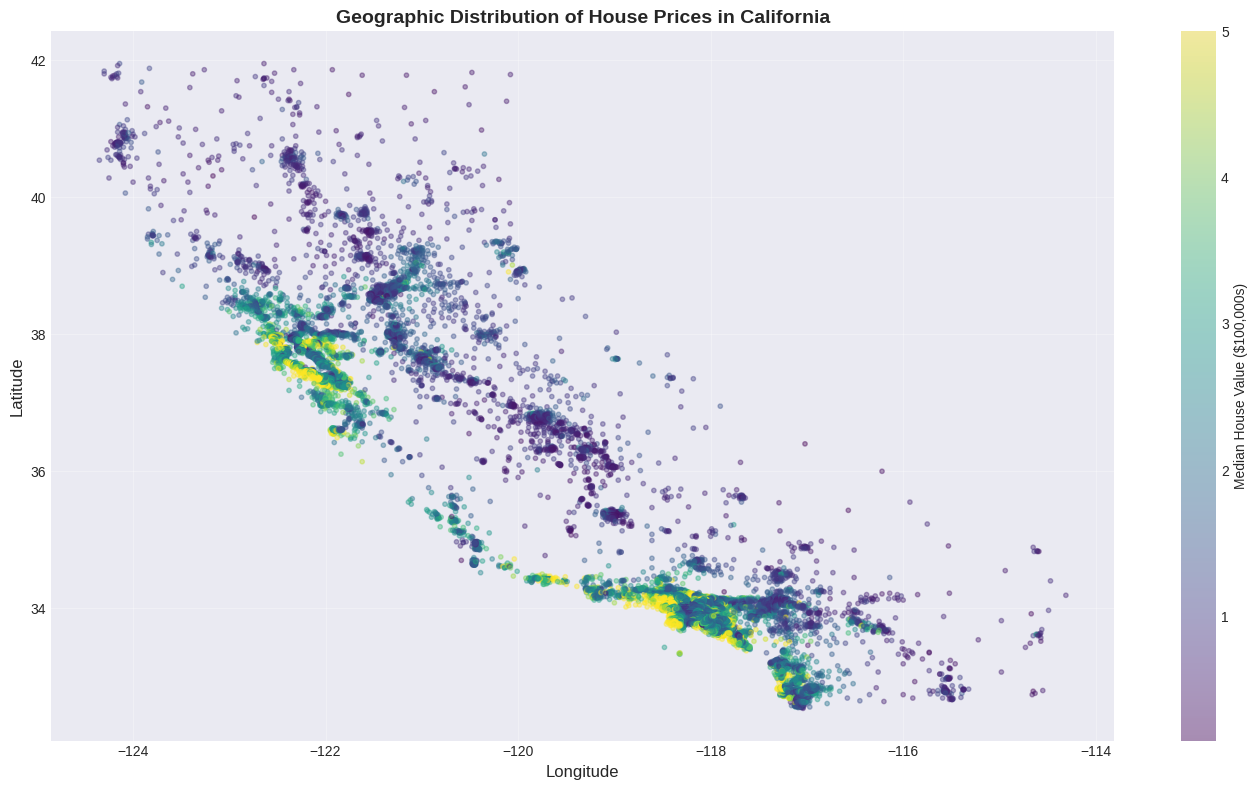

In [ ]:
# Geographic scatter plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'],
                     c=df['MedHouseVal'], cmap='viridis',
                     alpha=0.4, s=10)
plt.colorbar(scatter, label='Median House Value ($100,000s)')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Geographic Distribution of House Prices in California',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 3.3 Correlation Analysis


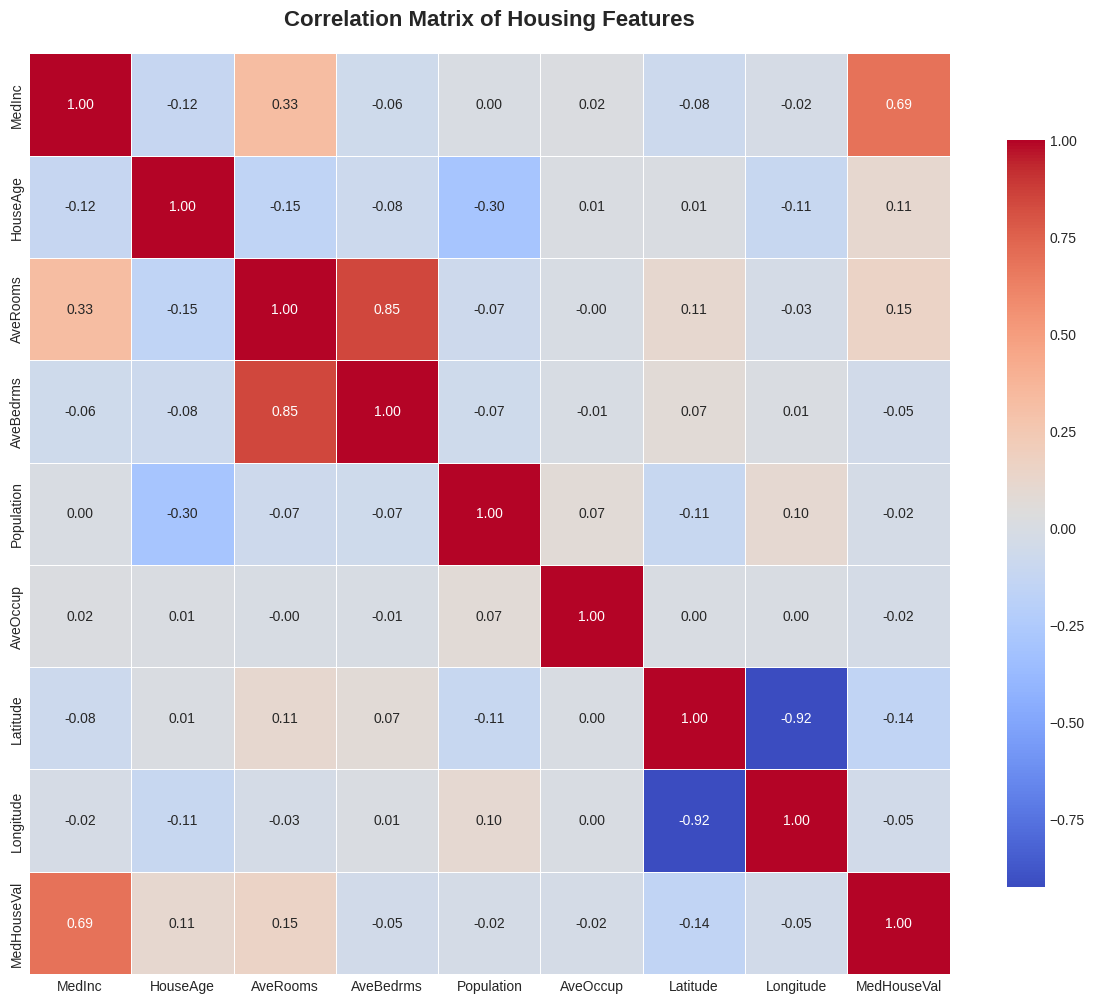


Correlation with Target Variable (MedHouseVal):
MedHouseVal    1.00
MedInc         0.69
AveRooms       0.15
HouseAge       0.11
AveOccup      -0.02
Population    -0.02
Longitude     -0.05
AveBedrms     -0.05
Latitude      -0.14
Name: MedHouseVal, dtype: float64


In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Housing Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelation with Target Variable (MedHouseVal):")
print("=" * 50)
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print(target_corr)


### 3.4 Pairwise Relationships


In [ ]:
import numpy as np
import pandas as pd

# ---------------------------------------------------------
# Step 1: Select the Upper Triangle of the Matrix
# (To avoid duplicates and self-correlation of 1.0)
# ---------------------------------------------------------

# We take the absolute value because -0.9 is as strong as +0.9
# If you only want positive correlations, remove .abs()
abs_corr = correlation_matrix.abs()

# Create a mask for the upper triangle (k=1 excludes the diagonal)
upper_tri_mask = np.triu(np.ones(abs_corr.shape), k=1).astype(bool)

# Apply the mask to get only the upper triangle values
upper_tri_corr = abs_corr.where(upper_tri_mask)

# ---------------------------------------------------------
# Step 2: Flatten (Stack) and Filter Data
# ---------------------------------------------------------

# Convert the matrix to a Series (list of pairs)
pairs = upper_tri_corr.stack()

# Filter pairs where absolute correlation is greater than 0.6
high_corr_pairs = pairs[pairs > 0.7]

# ---------------------------------------------------------
# Step 3: Format and Print the Results
# ---------------------------------------------------------

print(f"\nPairs with Absolute Correlation > 0.6 ({len(high_corr_pairs)} pairs found):")
print("=" * 60)

# Prepare a list to display original values (preserving negative signs)
results = []
for (f1, f2), val in high_corr_pairs.items():
    original_val = correlation_matrix.loc[f1, f2]
    results.append({
        'Feature 1': f1,
        'Feature 2': f2,
        'Correlation': original_val,  # Original value (+ or -)
        'Abs Correlation': val        # Absolute value for sorting
    })

# Create DataFrame and sort by correlation strength (highest first)
df_high_corr = pd.DataFrame(results).sort_values(by='Abs Correlation', ascending=False)

# Print the final table
print(df_high_corr[['Feature 1', 'Feature 2', 'Correlation']].to_string(index=False))


Pairs with Absolute Correlation > 0.6 (2 pairs found):
Feature 1 Feature 2  Correlation
 Latitude Longitude        -0.92
 AveRooms AveBedrms         0.85


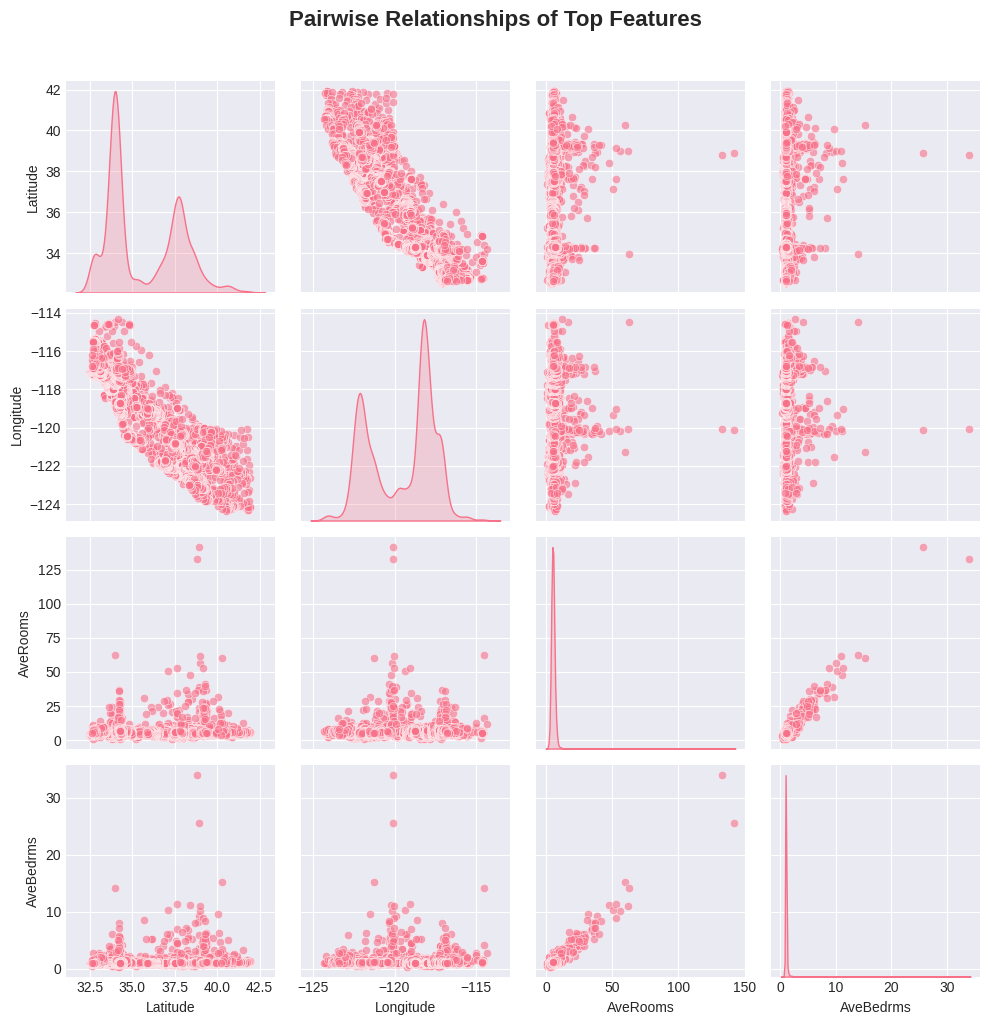

In [ ]:
# Select top correlated features for pairplot
top_features = ['Latitude', 'Longitude', 'AveRooms', 'AveBedrms']

# Create pairplot
sns.pairplot(df[top_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Top Features', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Let's drop Latitude, AveBedrms, MedInc

df=df.drop(["Latitude","AveBedrms"],axis=1)

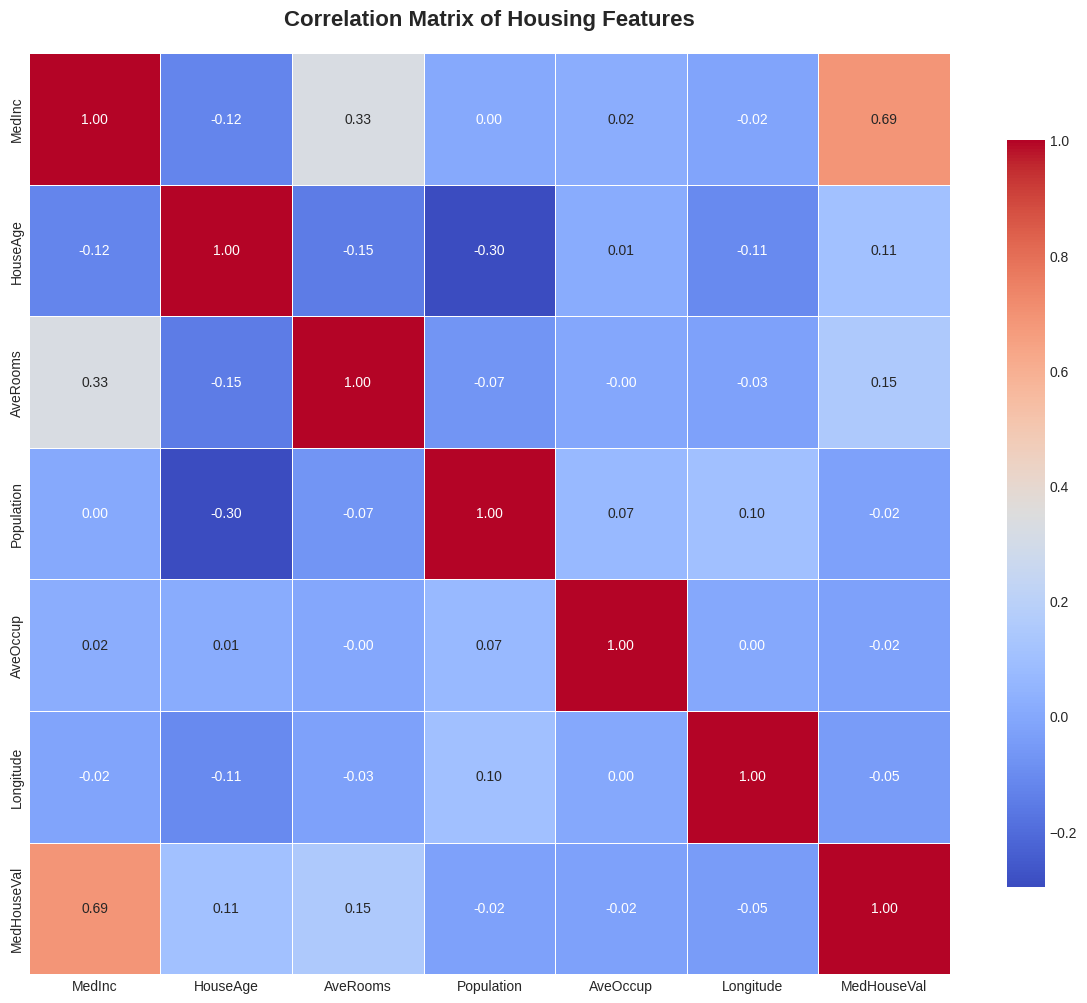


Correlation with Target Variable (MedHouseVal):
MedHouseVal    1.00
MedInc         0.69
AveRooms       0.15
HouseAge       0.11
AveOccup      -0.02
Population    -0.02
Longitude     -0.05
Name: MedHouseVal, dtype: float64


In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Housing Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelation with Target Variable (MedHouseVal):")
print("=" * 50)
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print(target_corr)


### 3.5 Scatter Plots: Features vs Target


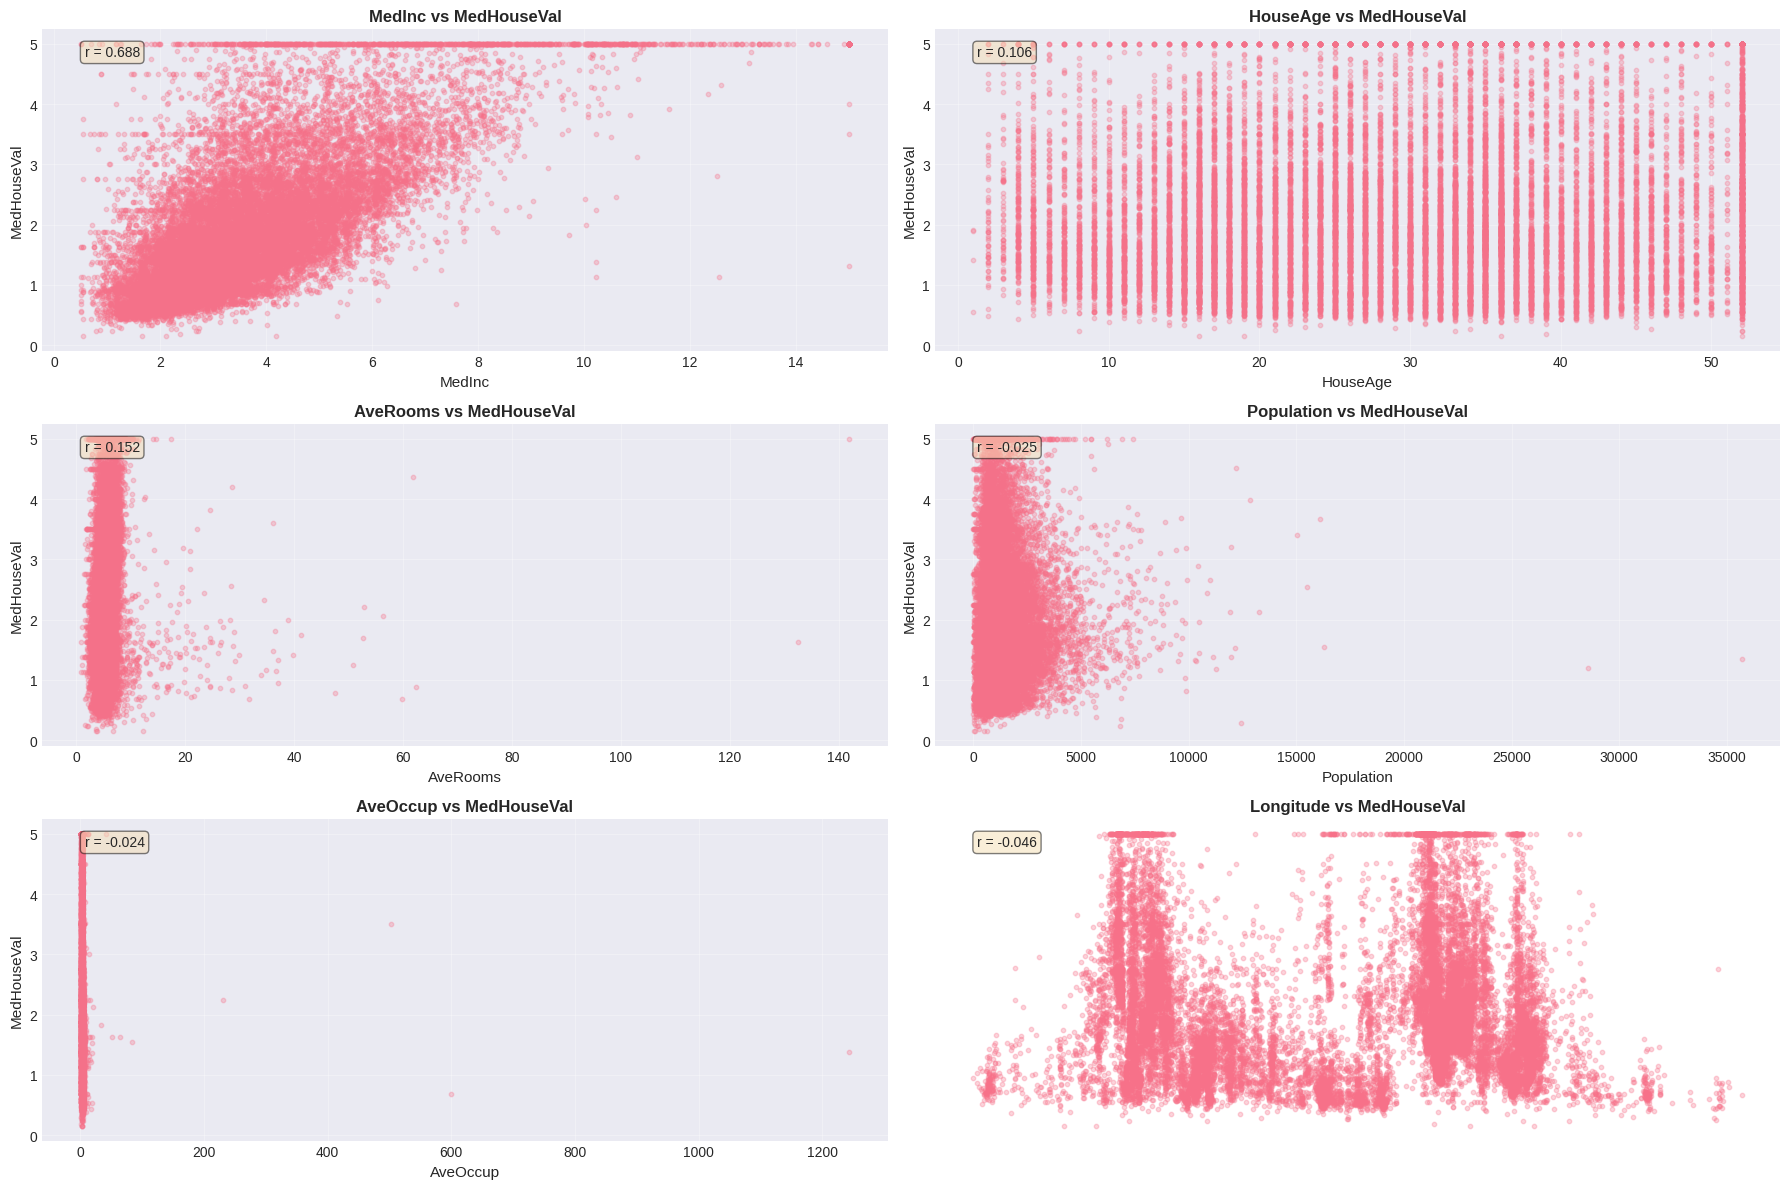

In [ ]:
# Scatter plots for each feature against target
features = [col for col in df.columns if col != 'MedHouseVal']

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].scatter(df[feature], df['MedHouseVal'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('MedHouseVal', fontsize=11)
    axes[idx].set_title(f'{feature} vs MedHouseVal', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # Add correlation coefficient
    corr = df[feature].corr(df['MedHouseVal'])
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}',
                   transform=axes[idx].transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()


---
## 4. Feature Engineering

Feature engineering involves creating new features or transforming existing ones to improve model performance.

### 4.1 Creating New Features


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   Population   20640 non-null  float64
 4   AveOccup     20640 non-null  float64
 5   Longitude    20640 non-null  float64
 6   MedHouseVal  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
# Create a copy of the dataframe for feature engineering
df_engineered = df.copy()


df_engineered["RoomsPerPerson"] = df_engineered["AveRooms"] / df_engineered["AveOccup"]

df_engineered["PopPerHousehold"] = df_engineered["Population"] / df_engineered["AveOccup"]

df_engineered["Income_Lat"] = df_engineered["MedInc"] * df_engineered["Longitude"]



print("New features created successfully!")
print("\nNew feature statistics:")
print("=" * 50)
print(df_engineered[['RoomsPerPerson',"PopPerHousehold","Income_Lat"]].describe())


New features created successfully!

New feature statistics:
       RoomsPerPerson  PopPerHousehold  Income_Lat
count        2.06e+04         20640.00    20640.00
mean         1.98e+00           499.54     -462.87
std          1.15e+00           382.33      227.50
min          2.55e-03             1.00    -1837.51
25%          1.52e+00           280.00     -568.41
50%          1.94e+00           409.00     -422.82
75%          2.30e+00           605.00     -306.72
max          5.52e+01          6082.00      -58.44


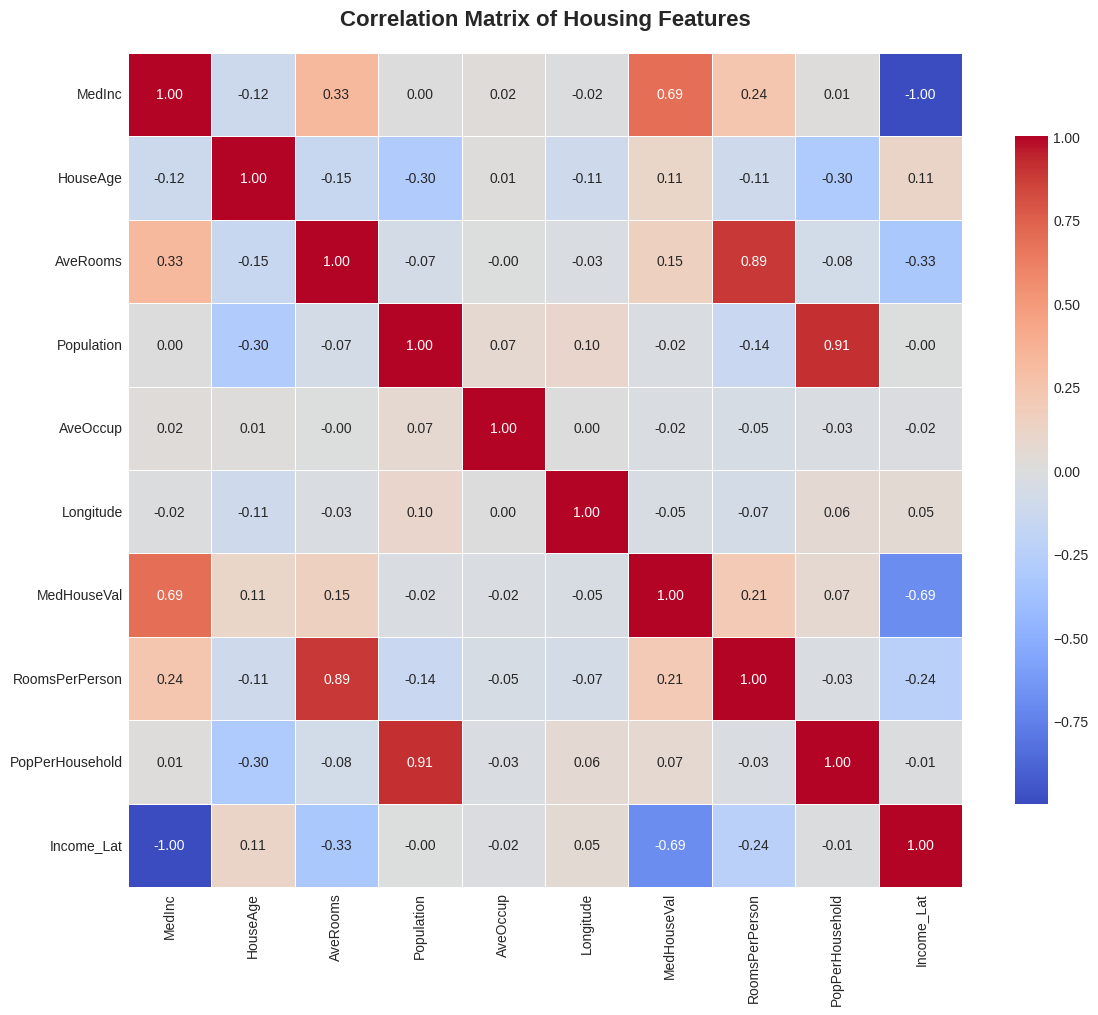


Correlation with Target Variable (MedHouseVal):
MedHouseVal        1.00
MedInc             0.69
RoomsPerPerson     0.21
AveRooms           0.15
HouseAge           0.11
PopPerHousehold    0.07
AveOccup          -0.02
Population        -0.02
Longitude         -0.05
Income_Lat        -0.69
Name: MedHouseVal, dtype: float64


In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_engineered.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Housing Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelation with Target Variable (MedHouseVal):")
print("=" * 50)
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print(target_corr)


### 4.2 Visualizing Engineered Features


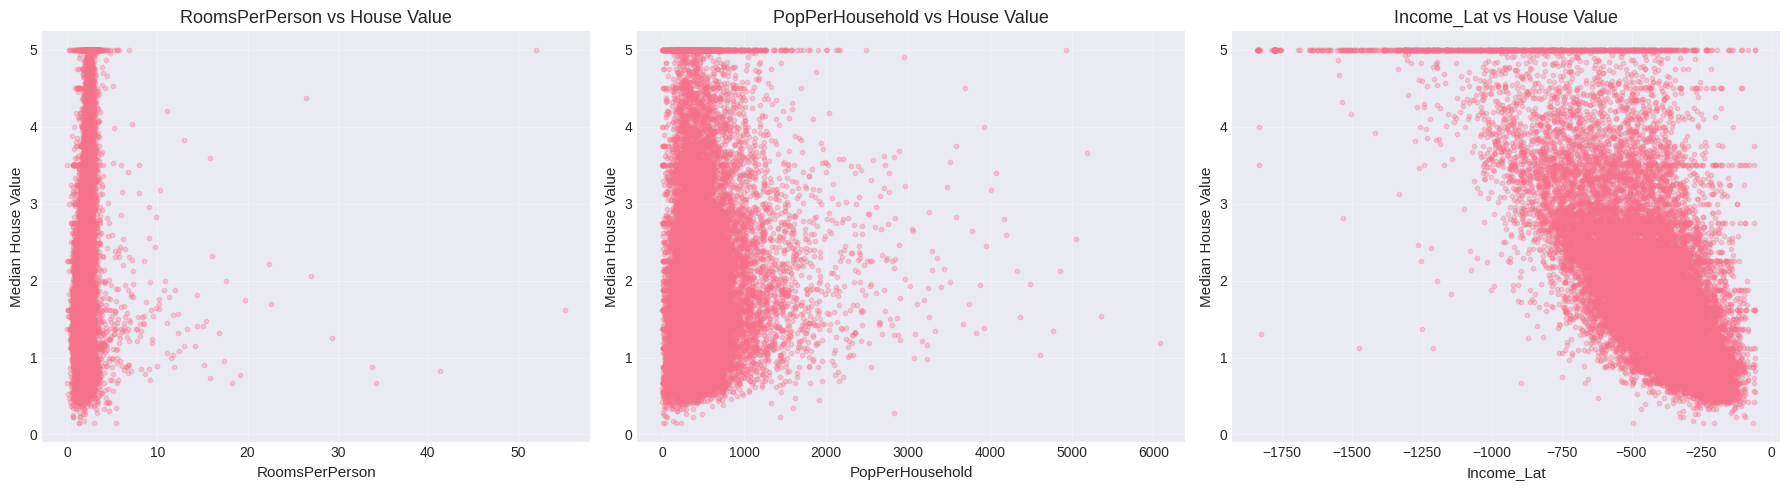

In [ ]:
import matplotlib.pyplot as plt

features = ["RoomsPerPerson", "PopPerHousehold", "Income_Lat"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, feature in zip(axes, features):
    ax.scatter(df_engineered[feature], df_engineered["MedHouseVal"],
               alpha=0.3, s=10)
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel("Median House Value", fontsize=11)
    ax.set_title(f"{feature} vs House Value", fontsize=13)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---
## 5. Data Splitting

Split the data into training and testing sets.


In [ ]:
X=df_engineered.drop(["MedHouseVal"],axis=1)
y=df_engineered["MedHouseVal"]
;
# Split the data (90% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Testing set size: {X_test.shape[0]:,} samples")
print(f"\nTraining set: {X_train.shape[0]/len(X)*100:.1f}% of data")
print(f"Testing set: {X_test.shape[0]/len(X)*100:.1f}% of data")


Training set size: 16,512 samples
Testing set size: 4,128 samples

Training set: 80.0% of data
Testing set: 20.0% of data


### 5.1 Feature Scaling



In [ ]:
"""
    Applies IQR-based outlier capping (winsorization) to numerical features.

    Parameters
    ----------
    train_df : pd.DataFrame
        Training feature set (used to compute IQR thresholds).
    test_df : pd.DataFrame
        Test feature set (only transformed, never used for fitting).
    factor : float, default=1.5
        Controls the aggressiveness of capping.
        - 1.5 : standard Tukey rule
        - 3.0 : very conservative (fewer values capped)

    Returns
    -------
    train_capped : pd.DataFrame
        Training data with capped outliers.
    test_capped : pd.DataFrame
        Test data capped using TRAIN thresholds (prevents data leakage).
    """

def iqr_capping(train_df, test_df, factor=1.5):
    train_capped = train_df.copy()
    test_capped = test_df.copy()

    for col in train_df.columns:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        train_capped[col] = train_df[col].clip(lower, upper)
        test_capped[col] = test_df[col].clip(lower, upper)

    return train_capped, test_capped
X_train_capped, X_test_capped = iqr_capping(X_train, X_test)


In [ ]:
# Standard Scaling
# ---------------------------------------------------------
# StandardScaler standardizes features by removing the mean
# and scaling to unit variance:
#     x_scaled = (x - mean) / std
#
# Why we use it:
# - Ensures all features contribute equally to the model
# - Improves convergence for gradient- and distance-based models
# - Prevents large-magnitude features from dominating learning
#
# Best practices:
# - Fit ONLY on training data to avoid data leakage
# - Apply the same scaler to validation/test data
# - Use after outlier handling (mean & std are outlier-sensitive)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_capped)
X_test_scaled = scaler.transform(X_test_capped)

# Tekrar DataFrame’e çevir
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)


print("✓ Outlier capping + StandardScaler applied successfully!")

print("\nScaled Training Data Statistics:")
print("-" * 60)
print(X_train_scaled.describe().round(2))

print("\nFirst 5 rows of scaled data:")
print("-" * 60)
print(X_train_scaled.head())

✓ Outlier capping + StandardScaler applied successfully!

Scaled Training Data Statistics:
------------------------------------------------------------
         MedInc  HouseAge  AveRooms  Population  AveOccup  Longitude  \
count  16512.00  16512.00  16512.00    16512.00  16512.00   16512.00   
mean       0.00     -0.00     -0.00       -0.00      0.00       0.00   
std        1.00      1.00      1.00        1.00      1.00       1.00   
min       -1.99     -2.19     -2.63       -1.75     -2.53      -2.38   
25%       -0.75     -0.84     -0.69       -0.72     -0.68      -1.11   
50%       -0.16      0.03     -0.06       -0.22     -0.12       0.53   
75%        0.58      0.67      0.60        0.51      0.55       0.78   
max        2.56      1.86      2.54        2.34      2.40       2.63   

       RoomsPerPerson  PopPerHousehold  Income_Lat  
count        16512.00         16512.00    16512.00  
mean            -0.00            -0.00       -0.00  
std              1.00             1.00  

---
## 6. Simple Linear Regression

**Simple Linear Regression** models the relationship between a single independent variable and the target variable.

**Equation:** y = β₀ + β₁x + ε

We'll use **Median Income (MedInc)** as it has the highest correlation with house prices.

### 6.1 Build Simple Linear Regression Model


In [ ]:
# Select single feature
feature_for_simple = 'MedInc'

# Prepare data for simple linear regression
X_train_simple = X_train_scaled[[feature_for_simple]]
X_test_simple = X_test_scaled[[feature_for_simple]]

# Create and train the model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Model parameters
print("Simple Linear Regression Model")
print("=" * 50)
print(f"Feature used: {feature_for_simple}")
print(f"\nModel Equation: y = {simple_lr.intercept_:.4f} + {simple_lr.coef_[0]:.4f} * {feature_for_simple}")
print(f"\nIntercept (β₀): {simple_lr.intercept_:.4f}")
print(f"Coefficient (β₁): {simple_lr.coef_[0]:.4f}")


Simple Linear Regression Model
Feature used: MedInc

Model Equation: y = 2.0719 + 0.8009 * MedInc

Intercept (β₀): 2.0719
Coefficient (β₁): 0.8009


### 6.2 Make Predictions


In [ ]:
# Make predictions
y_train_pred_simple = simple_lr.predict(X_train_simple)
y_test_pred_simple = simple_lr.predict(X_test_simple)

# Display sample predictions
predictions_df = pd.DataFrame({
    feature_for_simple: X_test_simple[feature_for_simple].head(10).values,
    'Actual Value': y_test.head(10).values,
    'Predicted Value': y_test_pred_simple[:10],
    'Difference': y_test.head(10).values - y_test_pred_simple[:10]
})

print("Sample Predictions (First 10 Test Samples):")
print("=" * 50)
print(predictions_df)


Sample Predictions (First 10 Test Samples):
   MedInc  Actual Value  Predicted Value  Difference
0   -1.28          0.48             1.05       -0.57
1   -0.77          0.46             1.46       -1.00
2   -0.20          5.00             1.91        3.09
3    1.15          2.19             3.00       -0.81
4   -0.05          2.78             2.03        0.75
5    0.54          1.59             2.50       -0.92
6    0.76          1.98             2.68       -0.70
7   -0.07          1.57             2.01       -0.44
8    0.59          3.40             2.55        0.85
9    2.56          4.47             4.12        0.34


### 6.3 Simple Linear Regression - Model Evaluation


In [ ]:
# Calculate metrics for training set
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
train_rmse_simple = np.sqrt(train_mse_simple)
train_mae_simple = mean_absolute_error(y_train, y_train_pred_simple)
train_r2_simple = r2_score(y_train, y_train_pred_simple)

# Calculate metrics for testing set
test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_rmse_simple = np.sqrt(test_mse_simple)
test_mae_simple = mean_absolute_error(y_test, y_test_pred_simple)
test_r2_simple = r2_score(y_test, y_test_pred_simple)

# Display results
print("SIMPLE LINEAR REGRESSION - MODEL EVALUATION")
print("=" * 70)
print(f"\n{'Metric':<30} {'Training Set':<20} {'Testing Set':<20}")
print("-" * 70)
print(f"{'Mean Squared Error (MSE)':<30} {train_mse_simple:<20.4f} {test_mse_simple:<20.4f}")
print(f"{'Root Mean Squared Error (RMSE)':<30} {train_rmse_simple:<20.4f} {test_rmse_simple:<20.4f}")
print(f"{'Mean Absolute Error (MAE)':<30} {train_mae_simple:<20.4f} {test_mae_simple:<20.4f}")
print(f"{'R-squared (R²)':<30} {train_r2_simple:<20.4f} {test_r2_simple:<20.4f}")
print("=" * 70)

print("\n📊 Interpretation:")
print(f"  • The model explains {test_r2_simple*100:.2f}% of the variance in house prices")
print(f"  • On average, predictions are off by ${test_rmse_simple:.2f} × $100,000 = ${test_rmse_simple*100000:,.0f}")
print(f"  • Mean absolute error: ${test_mae_simple*100000:,.0f}")


SIMPLE LINEAR REGRESSION - MODEL EVALUATION

Metric                         Training Set         Testing Set         
----------------------------------------------------------------------
Mean Squared Error (MSE)       0.6954               0.7102              
Root Mean Squared Error (RMSE) 0.8339               0.8427              
Mean Absolute Error (MAE)      0.6300               0.6351              
R-squared (R²)                 0.4798               0.4580              

📊 Interpretation:
  • The model explains 45.80% of the variance in house prices
  • On average, predictions are off by $0.84 × $100,000 = $84,273
  • Mean absolute error: $63,509


### 6.4 Visualization of Simple Linear Regression


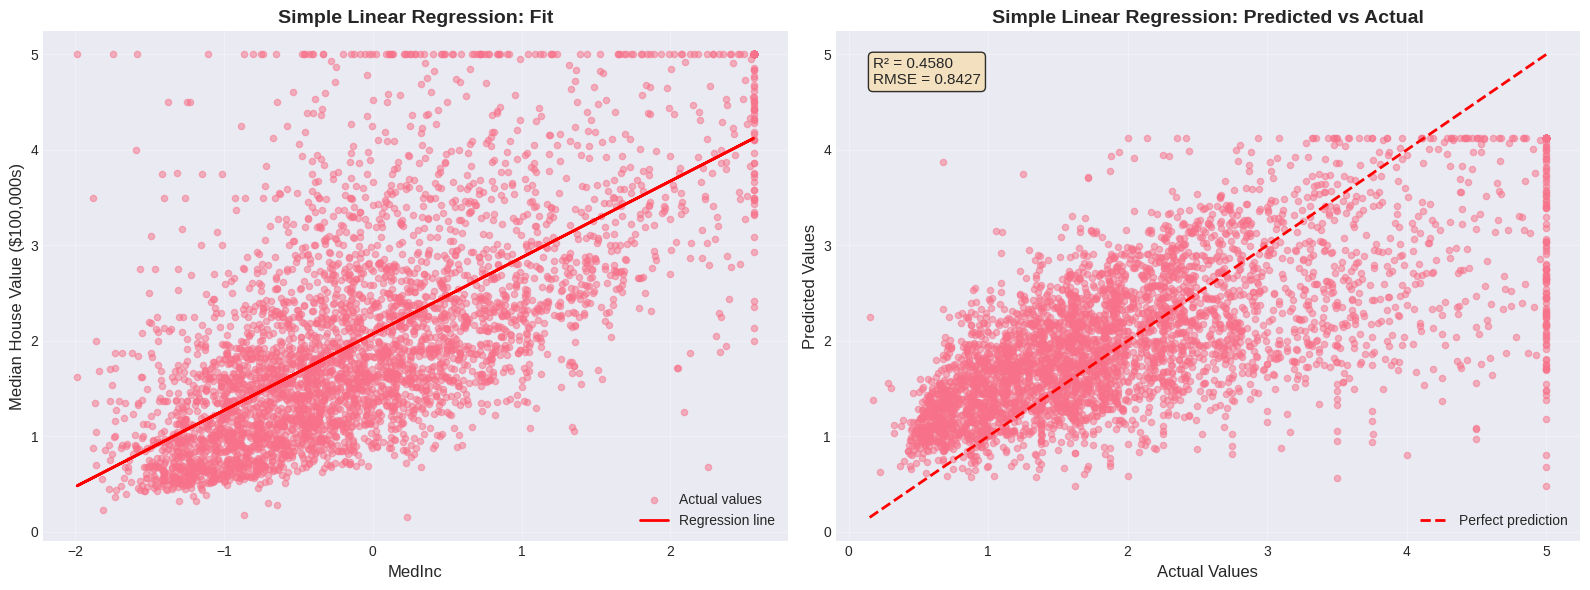

In [ ]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Regression line
axes[0].scatter(X_test_simple, y_test, alpha=0.5, s=20, label='Actual values')
axes[0].plot(X_test_simple, y_test_pred_simple, color='red', linewidth=2, label='Regression line')
axes[0].set_xlabel(f'{feature_for_simple}', fontsize=12)
axes[0].set_ylabel('Median House Value ($100,000s)', fontsize=12)
axes[0].set_title('Simple Linear Regression: Fit', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Predicted vs Actual
axes[1].scatter(y_test, y_test_pred_simple, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect prediction')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title('Simple Linear Regression: Predicted vs Actual', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Add R² score to the plot
axes[1].text(0.05, 0.95, f'R² = {test_r2_simple:.4f}\nRMSE = {test_rmse_simple:.4f}',
            transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


### 6.5 Residual Analysis for Simple Linear Regression


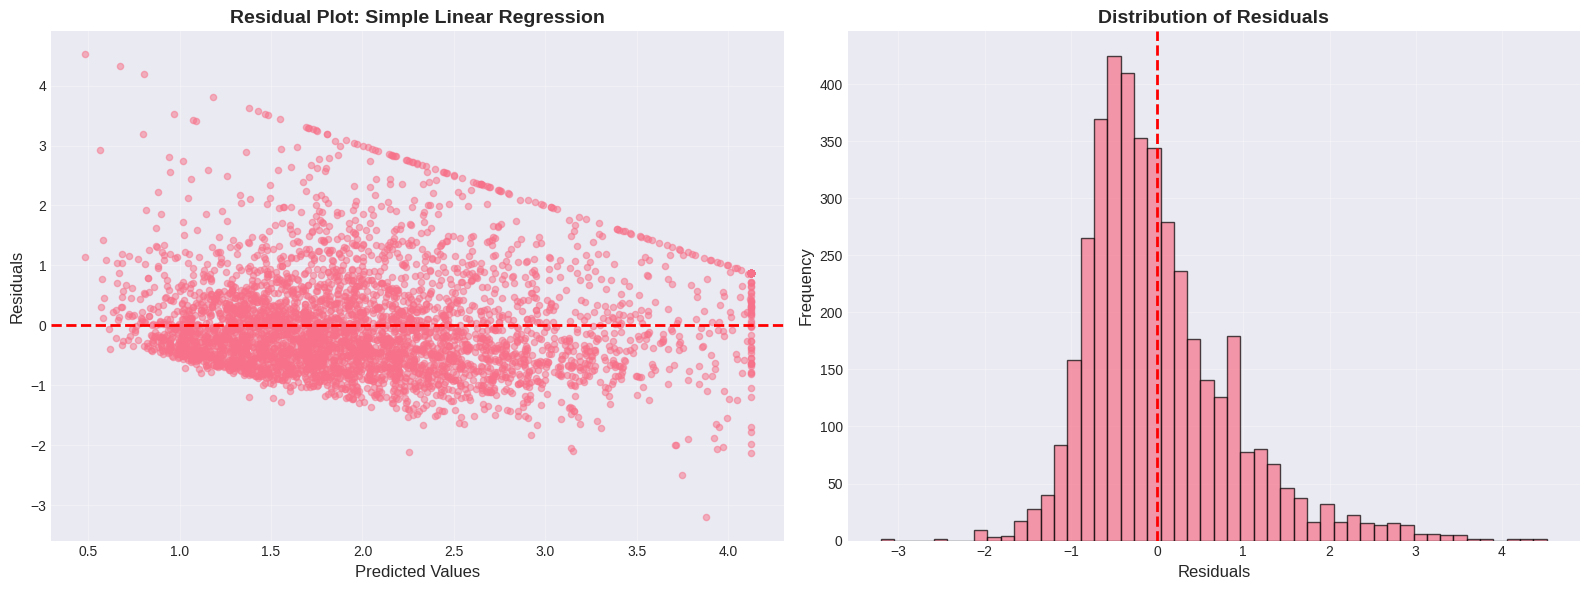

Residual Statistics:
Mean of residuals: 0.006942
Std Dev of residuals: 0.8428


In [ ]:
# Calculate residuals
residuals_simple = y_test - y_test_pred_simple

# Create residual plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residuals vs Predicted values
axes[0].scatter(y_test_pred_simple, residuals_simple, alpha=0.5, s=20)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Residual Plot: Simple Linear Regression', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1].hist(residuals_simple, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Residual Statistics:")
print("=" * 50)
print(f"Mean of residuals: {residuals_simple.mean():.6f}")
print(f"Std Dev of residuals: {residuals_simple.std():.4f}")


---
## 7. Multiple Linear Regression

**Multiple Linear Regression** models the relationship between multiple independent variables and the target variable.

**Equation:** y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

We'll use all available features to predict house prices.

### 7.1 Build Multiple Linear Regression Model


In [ ]:
# Create and train the model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scaled, y_train)

# Display model parameters
print("Multiple Linear Regression Model")
print("=" * 70)
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"\nIntercept (β₀): {multiple_lr.intercept_:.4f}")
print("\nFeature Coefficients (β):")
print("-" * 70)

# Create DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': multiple_lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(coef_df.to_string(index=False))


Multiple Linear Regression Model
Number of features: 9

Intercept (β₀): 2.0719

Feature Coefficients (β):
----------------------------------------------------------------------
        Feature  Coefficient
     Income_Lat        -2.63
         MedInc        -1.67
       AveRooms        -0.54
 RoomsPerPerson         0.48
       HouseAge         0.23
PopPerHousehold         0.17
       AveOccup         0.11
      Longitude         0.10
     Population        -0.09


### 7.2 Feature Importance Visualization


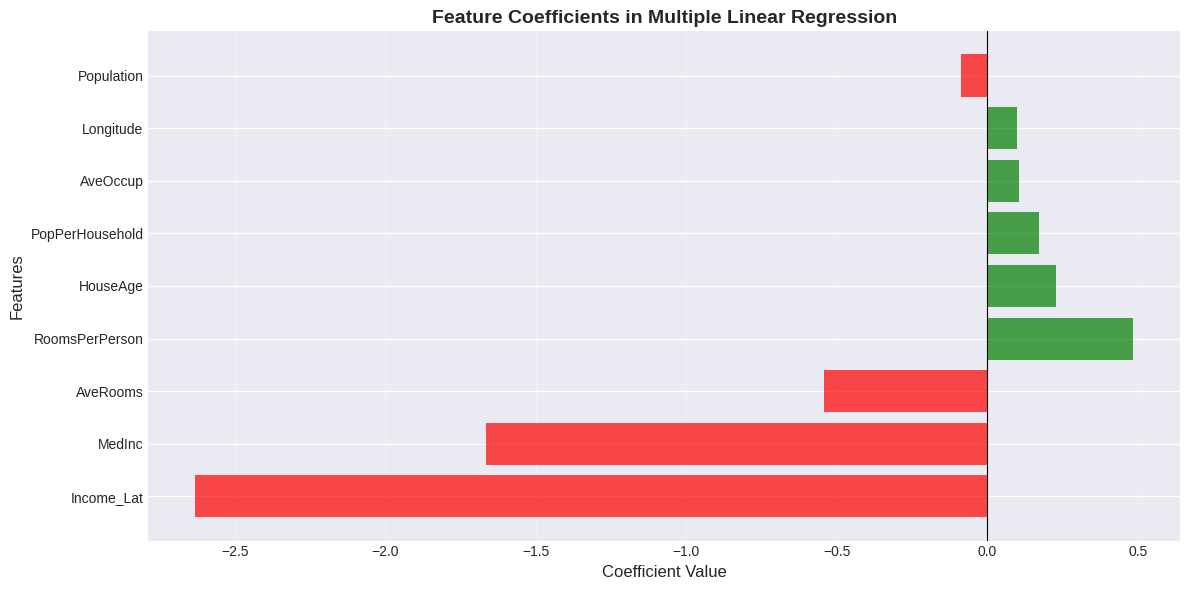


📊 Interpretation:
  • Positive coefficients: Increase in feature → Increase in house price
  • Negative coefficients: Increase in feature → Decrease in house price
  • Larger absolute values indicate stronger influence on price


In [ ]:
# Visualize feature coefficients
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Coefficients in Multiple Linear Regression', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("  • Positive coefficients: Increase in feature → Increase in house price")
print("  • Negative coefficients: Increase in feature → Decrease in house price")
print("  • Larger absolute values indicate stronger influence on price")


### 7.3 Make Predictions


In [ ]:
# Make predictions
y_train_pred_multiple = multiple_lr.predict(X_train_scaled)
y_test_pred_multiple = multiple_lr.predict(X_test_scaled)

# Display sample predictions
predictions_multi_df = pd.DataFrame({
    'Actual Value': y_test.head(10).values,
    'Predicted Value': y_test_pred_multiple[:10],
    'Difference': y_test.head(10).values - y_test_pred_multiple[:10],
    'Absolute Error': np.abs(y_test.head(10).values - y_test_pred_multiple[:10])
})

print("Sample Predictions (First 10 Test Samples):")
print("=" * 70)
print(predictions_multi_df)


Sample Predictions (First 10 Test Samples):
   Actual Value  Predicted Value  Difference  Absolute Error
0          0.48             0.67       -0.19            0.19
1          0.46             1.46       -1.00            1.00
2          5.00             3.77        1.23            1.23
3          2.19             2.52       -0.34            0.34
4          2.78             2.21        0.57            0.57
5          1.59             2.34       -0.75            0.75
6          1.98             2.55       -0.57            0.57
7          1.57             1.87       -0.30            0.30
8          3.40             2.98        0.42            0.42
9          4.47             4.50       -0.03            0.03


### 7.4 Multiple Linear Regression - Model Evaluation


In [ ]:
# Calculate metrics for training set
train_mse_multiple = mean_squared_error(y_train, y_train_pred_multiple)
train_rmse_multiple = np.sqrt(train_mse_multiple)
train_mae_multiple = mean_absolute_error(y_train, y_train_pred_multiple)
train_r2_multiple = r2_score(y_train, y_train_pred_multiple)

# Calculate metrics for testing set
test_mse_multiple = mean_squared_error(y_test, y_test_pred_multiple)
test_rmse_multiple = np.sqrt(test_mse_multiple)
test_mae_multiple = mean_absolute_error(y_test, y_test_pred_multiple)
test_r2_multiple = r2_score(y_test, y_test_pred_multiple)

# Display results
print("MULTIPLE LINEAR REGRESSION - MODEL EVALUATION")
print("=" * 70)
print(f"\n{'Metric':<30} {'Training Set':<20} {'Testing Set':<20}")
print("-" * 70)
print(f"{'Mean Squared Error (MSE)':<30} {train_mse_multiple:<20.4f} {test_mse_multiple:<20.4f}")
print(f"{'Root Mean Squared Error (RMSE)':<30} {train_rmse_multiple:<20.4f} {test_rmse_multiple:<20.4f}")
print(f"{'Mean Absolute Error (MAE)':<30} {train_mae_multiple:<20.4f} {test_mae_multiple:<20.4f}")
print(f"{'R-squared (R²)':<30} {train_r2_multiple:<20.4f} {test_r2_multiple:<20.4f}")
print("=" * 70)

print("\n📊 Interpretation:")
print(f"  • The model explains {test_r2_multiple*100:.2f}% of the variance in house prices")
print(f"  • On average, predictions are off by ${test_rmse_multiple:.2f} × $100,000 = ${test_rmse_multiple*100000:,.0f}")
print(f"  • Mean absolute error: ${test_mae_multiple*100000:,.0f}")


MULTIPLE LINEAR REGRESSION - MODEL EVALUATION

Metric                         Training Set         Testing Set         
----------------------------------------------------------------------
Mean Squared Error (MSE)       0.5123               0.5370              
Root Mean Squared Error (RMSE) 0.7158               0.7328              
Mean Absolute Error (MAE)      0.5304               0.5394              
R-squared (R²)                 0.6168               0.5902              

📊 Interpretation:
  • The model explains 59.02% of the variance in house prices
  • On average, predictions are off by $0.73 × $100,000 = $73,284
  • Mean absolute error: $53,942


### 7.5 Visualization of Multiple Linear Regression


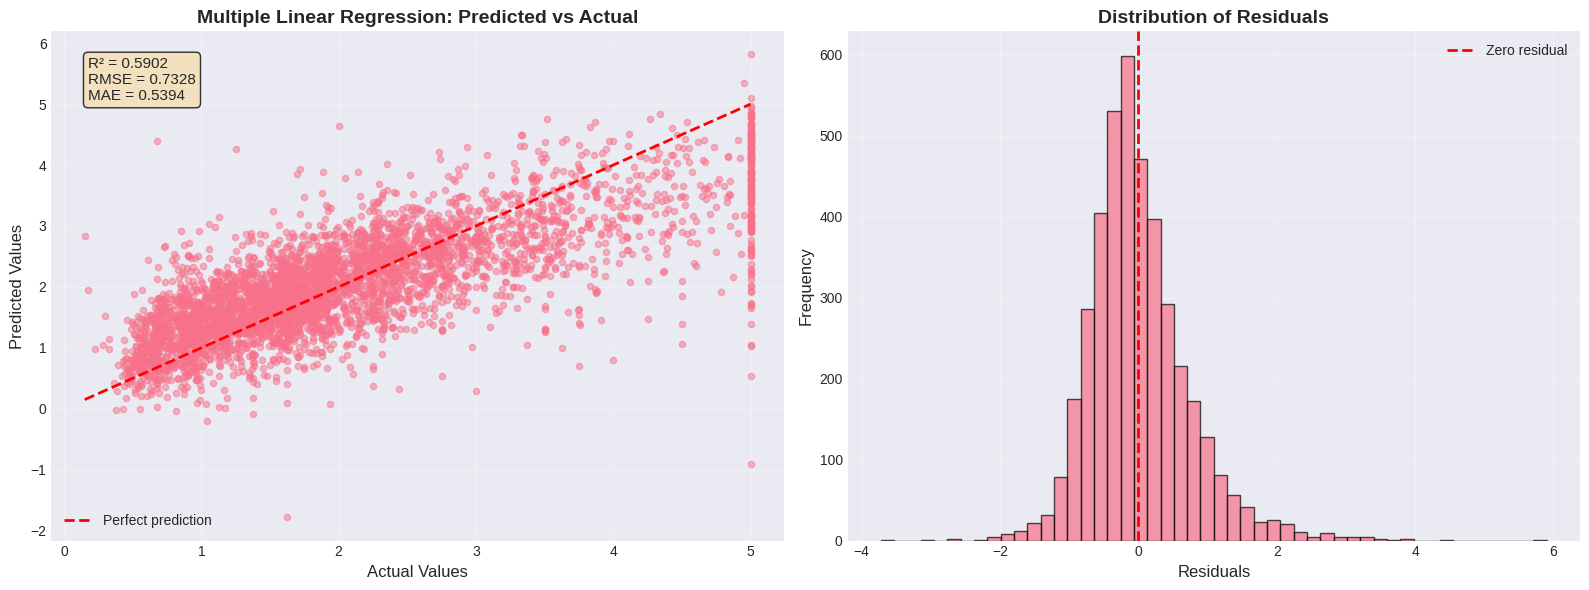

In [ ]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Predicted vs Actual
axes[0].scatter(y_test, y_test_pred_multiple, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title('Multiple Linear Regression: Predicted vs Actual', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add metrics to the plot
axes[0].text(0.05, 0.95, f'R² = {test_r2_multiple:.4f}\nRMSE = {test_rmse_multiple:.4f}\nMAE = {test_mae_multiple:.4f}',
            transform=axes[0].transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Right plot: Residuals distribution
residuals_multiple = y_test - y_test_pred_multiple
axes[1].hist(residuals_multiple, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero residual')
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 7.6 Residual Analysis for Multiple Linear Regression


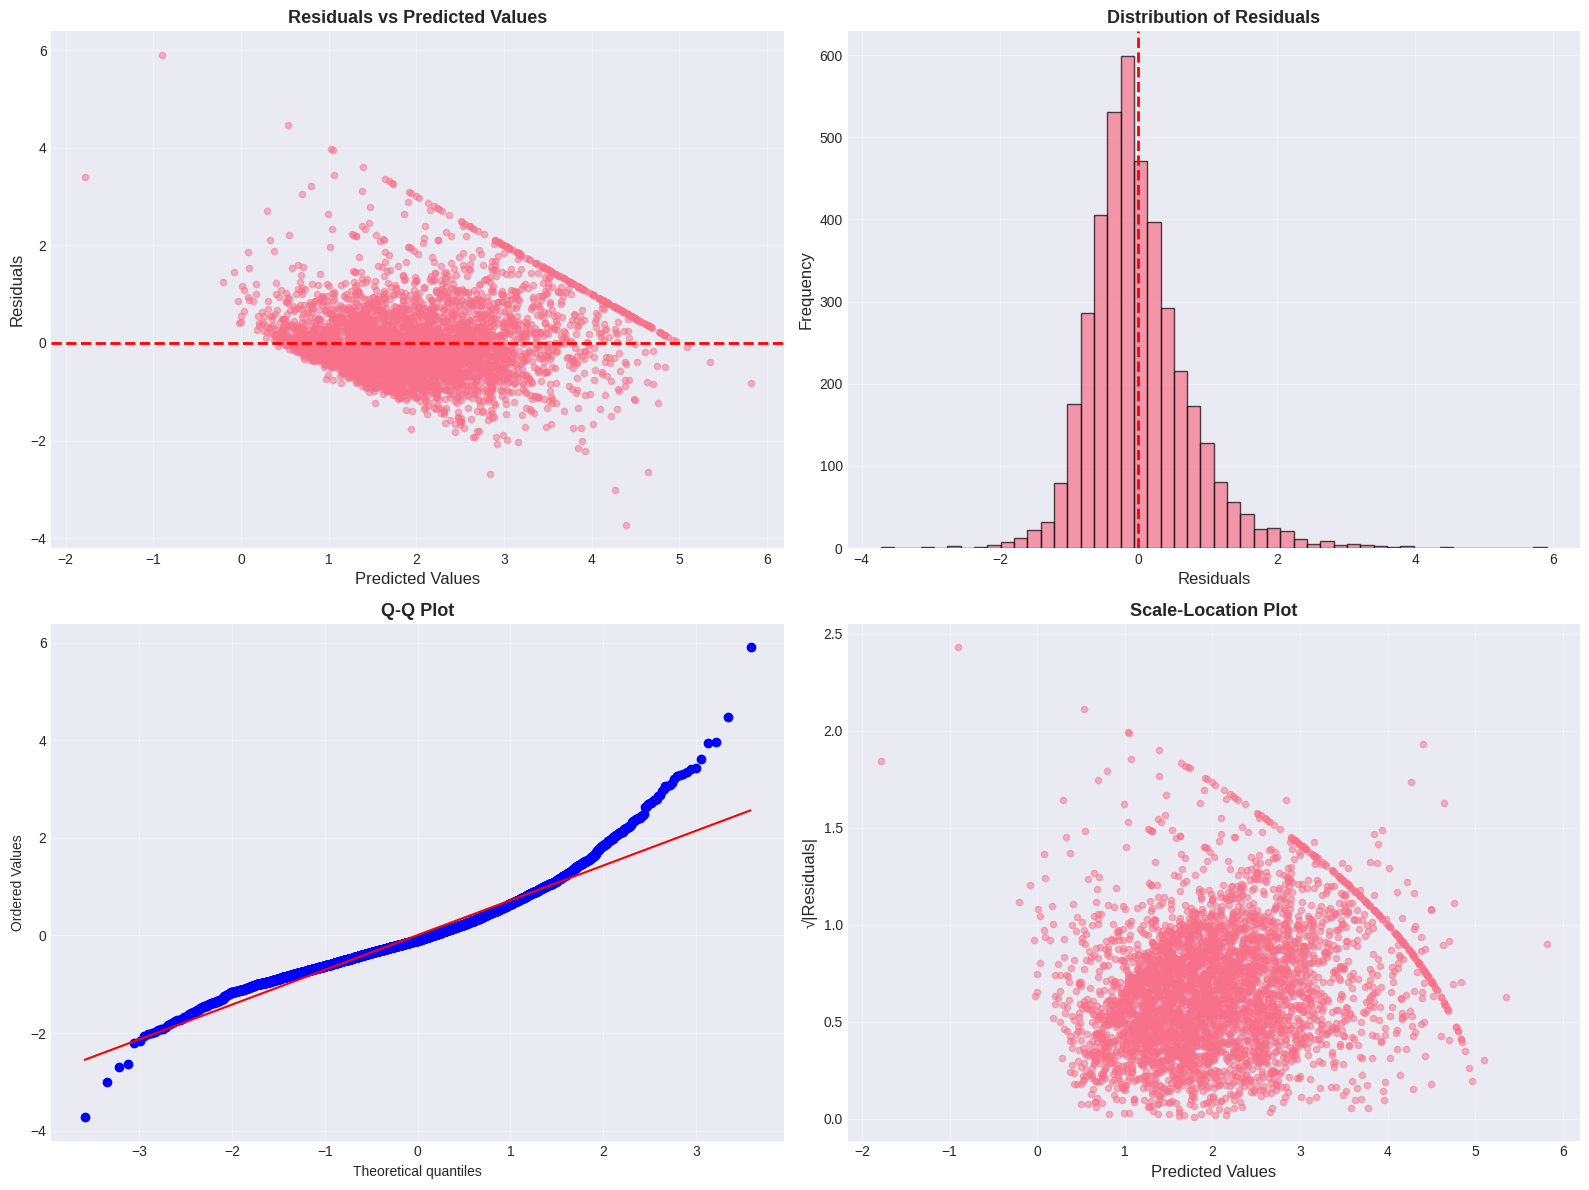

Residual Statistics:
Mean of residuals: 0.006454
Std Dev of residuals: 0.7329
Min residual: -3.7229
Max residual: 5.9019


In [ ]:
# Detailed residual plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuals vs Predicted values
axes[0, 0].scatter(y_test_pred_multiple, residuals_multiple, alpha=0.5, s=20)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Residuals vs Predicted Values', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram of residuals
axes[0, 1].hist(residuals_multiple, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q plot
from scipy import stats
stats.probplot(residuals_multiple, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scale-Location plot
residuals_sqrt = np.sqrt(np.abs(residuals_multiple))
axes[1, 1].scatter(y_test_pred_multiple, residuals_sqrt, alpha=0.5, s=20)
axes[1, 1].set_xlabel('Predicted Values', fontsize=12)
axes[1, 1].set_ylabel('√|Residuals|', fontsize=12)
axes[1, 1].set_title('Scale-Location Plot', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Residual Statistics:")
print("=" * 50)
print(f"Mean of residuals: {residuals_multiple.mean():.6f}")
print(f"Std Dev of residuals: {residuals_multiple.std():.4f}")
print(f"Min residual: {residuals_multiple.min():.4f}")
print(f"Max residual: {residuals_multiple.max():.4f}")


---
## 8. Model Comparison

Let's compare the performance of Simple Linear Regression vs Multiple Linear Regression.

### 8.1 Comprehensive Metrics Comparison


In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Simple LR (Train)': [train_mse_simple, train_rmse_simple, train_mae_simple, train_r2_simple],
    'Simple LR (Test)': [test_mse_simple, test_rmse_simple, test_mae_simple, test_r2_simple],
    'Multiple LR (Train)': [train_mse_multiple, train_rmse_multiple, train_mae_multiple, train_r2_multiple],
    'Multiple LR (Test)': [test_mse_multiple, test_rmse_multiple, test_mae_multiple, test_r2_multiple]
})

print("MODEL COMPARISON: SIMPLE vs MULTIPLE LINEAR REGRESSION")
print("=" * 90)
print(comparison_df.to_string(index=False))
print("=" * 90)

# Calculate improvements
rmse_improvement = ((test_rmse_simple - test_rmse_multiple) / test_rmse_simple) * 100
r2_improvement = ((test_r2_multiple - test_r2_simple) / test_r2_simple) * 100

print("\n📊 Key Insights:")
print(f"  • RMSE Improvement: {rmse_improvement:.2f}% (Multiple LR is better)")
print(f"  • R² Improvement: {r2_improvement:.2f}% (Multiple LR explains more variance)")
print(f"  • Multiple LR uses {X_train_scaled.shape[1]} features vs 1 feature in Simple LR")


MODEL COMPARISON: SIMPLE vs MULTIPLE LINEAR REGRESSION
Metric  Simple LR (Train)  Simple LR (Test)  Multiple LR (Train)  Multiple LR (Test)
   MSE               0.70              0.71                 0.51                0.54
  RMSE               0.83              0.84                 0.72                0.73
   MAE               0.63              0.64                 0.53                0.54
    R²               0.48              0.46                 0.62                0.59

📊 Key Insights:
  • RMSE Improvement: 13.04% (Multiple LR is better)
  • R² Improvement: 28.85% (Multiple LR explains more variance)
  • Multiple LR uses 9 features vs 1 feature in Simple LR


### 8.2 Visual Comparison


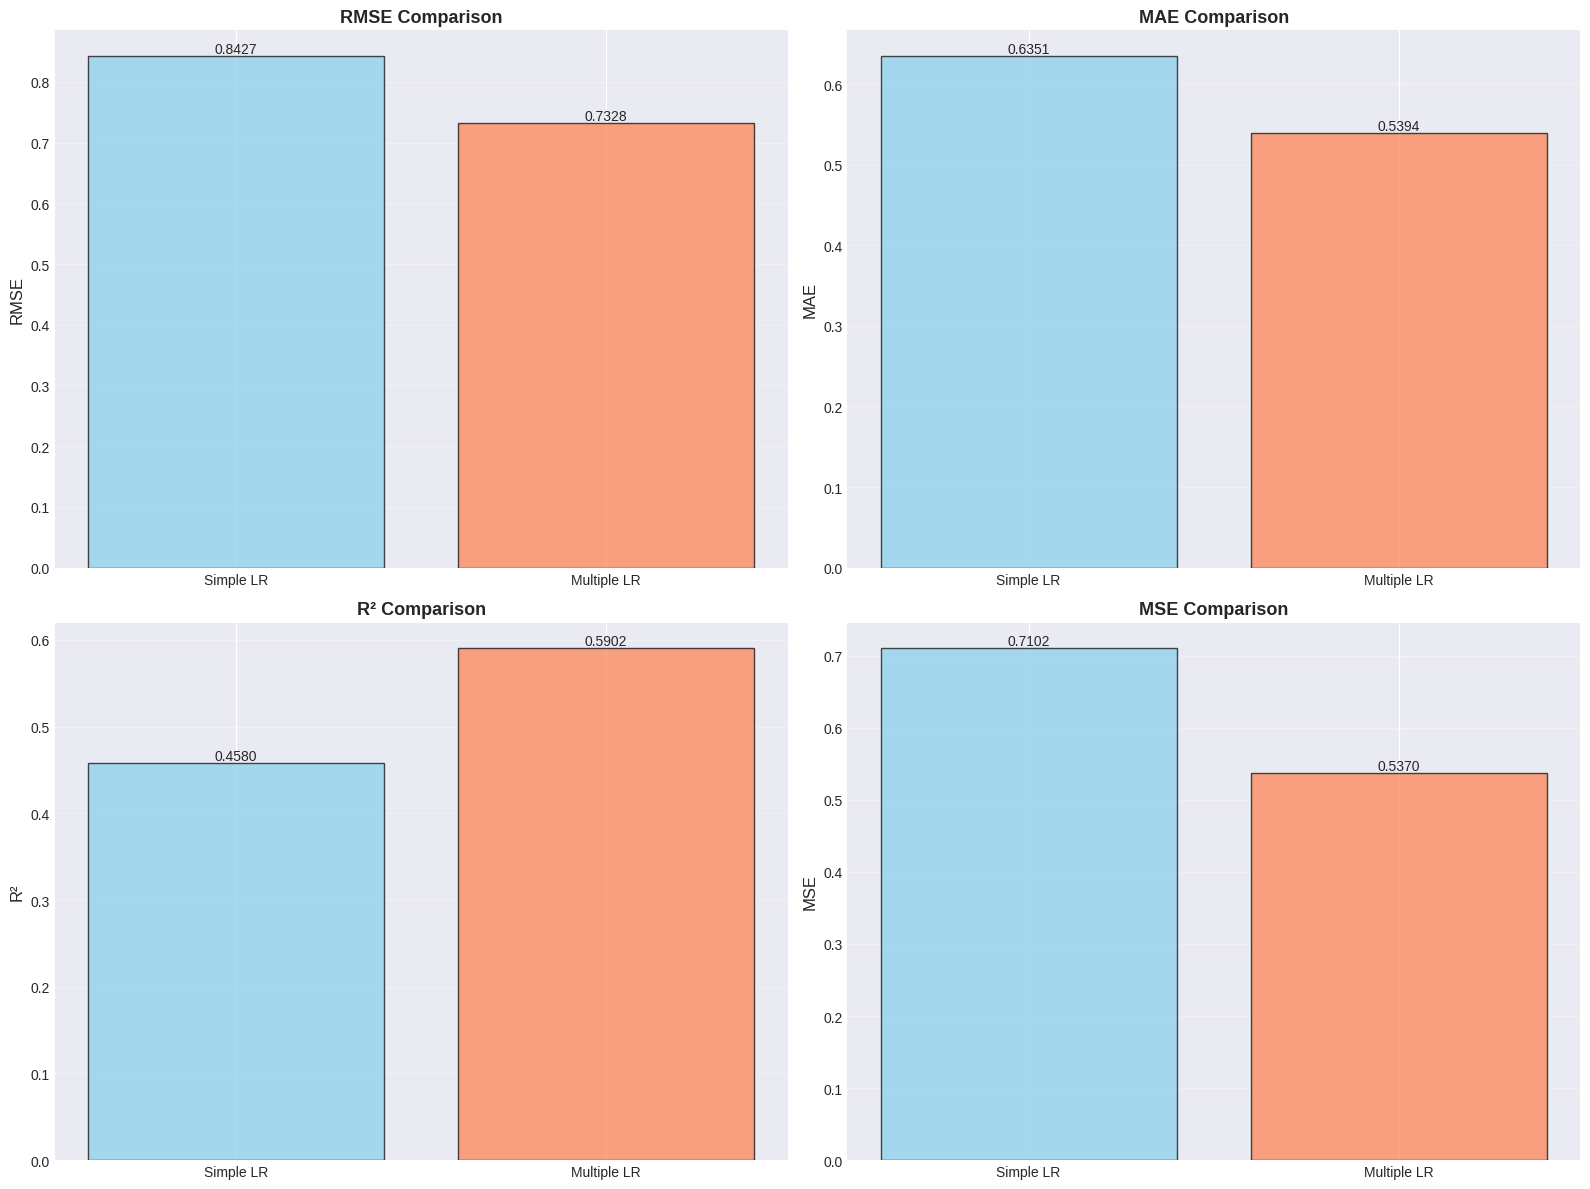

In [ ]:
# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['RMSE', 'MAE', 'R²', 'MSE']
simple_values = [test_rmse_simple, test_mae_simple, test_r2_simple, test_mse_simple]
multiple_values = [test_rmse_multiple, test_mae_multiple, test_r2_multiple, test_mse_multiple]

for idx, (metric, simple_val, multiple_val) in enumerate(zip(metrics, simple_values, multiple_values)):
    row, col = idx // 2, idx % 2

    bars = axes[row, col].bar(['Simple LR', 'Multiple LR'], [simple_val, multiple_val],
                               color=['skyblue', 'coral'], alpha=0.7, edgecolor='black')
    axes[row, col].set_ylabel(metric, fontsize=12)
    axes[row, col].set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### 8.3 Prediction Comparison on Test Set


In [ ]:
# Compare predictions side by side
comparison_predictions = pd.DataFrame({
    'Actual': y_test.head(15).values,
    'Simple LR': y_test_pred_simple[:15],
    'Multiple LR': y_test_pred_multiple[:15],
    'Error (Simple)': np.abs(y_test.head(15).values - y_test_pred_simple[:15]),
    'Error (Multiple)': np.abs(y_test.head(15).values - y_test_pred_multiple[:15])
})

print("PREDICTION COMPARISON (First 15 Test Samples)")
print("=" * 90)
print(comparison_predictions.to_string(index=True))
print("=" * 90)


PREDICTION COMPARISON (First 15 Test Samples)
    Actual  Simple LR  Multiple LR  Error (Simple)  Error (Multiple)
0     0.48       1.05         0.67            0.57              0.19
1     0.46       1.46         1.46            1.00              1.00
2     5.00       1.91         3.77            3.09              1.23
3     2.19       3.00         2.52            0.81              0.34
4     2.78       2.03         2.21            0.75              0.57
5     1.59       2.50         2.34            0.92              0.75
6     1.98       2.68         2.55            0.70              0.57
7     1.57       2.01         1.87            0.44              0.30
8     3.40       2.55         2.98            0.85              0.42
9     4.47       4.12         4.50            0.34              0.03
10    1.23       1.46         1.31            0.23              0.08
11    2.54       1.68         1.98            0.86              0.56
12    2.15       1.61         1.50            0.54       

### 8.4 Error Distribution Comparison


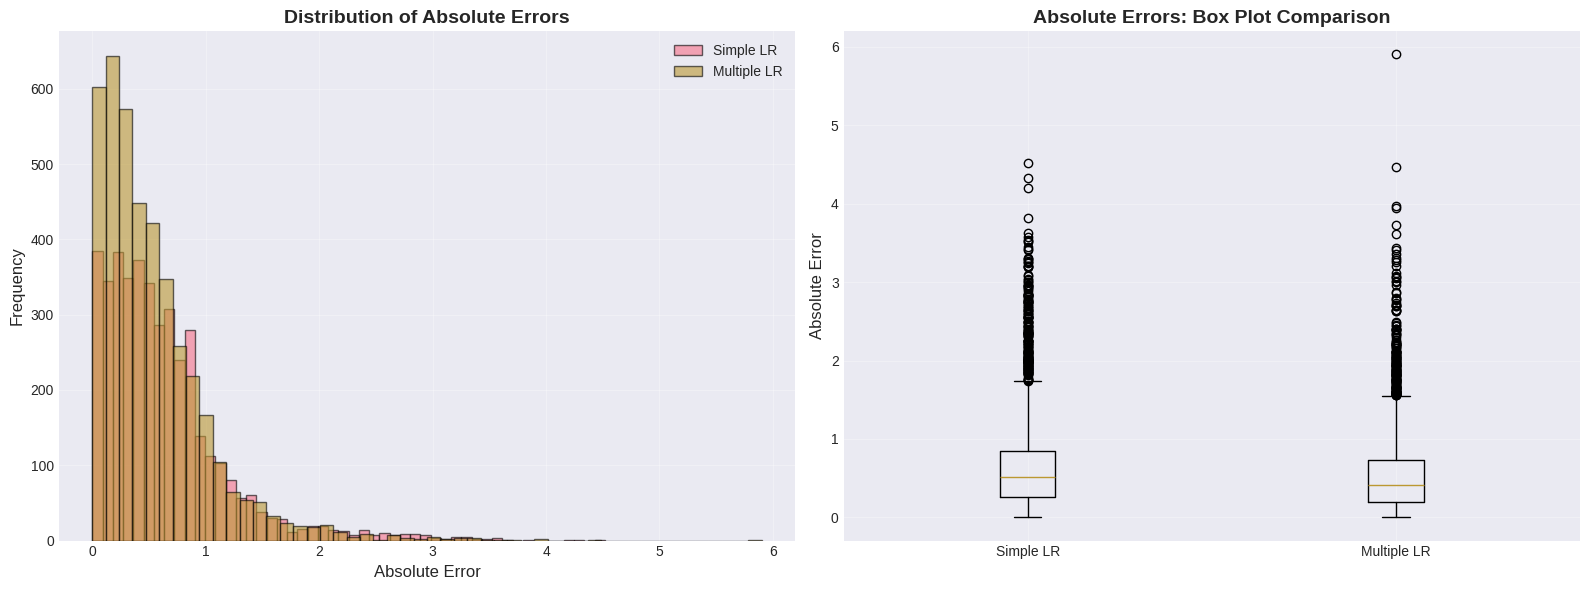

Error Statistics Comparison:
Statistic                 Simple LR            Multiple LR         
----------------------------------------------------------------------
Mean Absolute Error       0.6351               0.5394              
Median Absolute Error     0.5130               0.4183              
Std Dev of Errors         0.5540               0.4961              
Max Error                 4.5189               5.9019              


In [ ]:
# Compare error distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Absolute errors comparison
abs_errors_simple = np.abs(y_test - y_test_pred_simple)
abs_errors_multiple = np.abs(y_test - y_test_pred_multiple)

axes[0].hist(abs_errors_simple, bins=50, alpha=0.6, label='Simple LR', edgecolor='black')
axes[0].hist(abs_errors_multiple, bins=50, alpha=0.6, label='Multiple LR', edgecolor='black')
axes[0].set_xlabel('Absolute Error', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Absolute Errors', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot comparison
axes[1].boxplot([abs_errors_simple, abs_errors_multiple],
                labels=['Simple LR', 'Multiple LR'])
axes[1].set_ylabel('Absolute Error', fontsize=12)
axes[1].set_title('Absolute Errors: Box Plot Comparison', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Error Statistics Comparison:")
print("=" * 70)
print(f"{'Statistic':<25} {'Simple LR':<20} {'Multiple LR':<20}")
print("-" * 70)
print(f"{'Mean Absolute Error':<25} {abs_errors_simple.mean():<20.4f} {abs_errors_multiple.mean():<20.4f}")
print(f"{'Median Absolute Error':<25} {abs_errors_simple.median():<20.4f} {abs_errors_multiple.median():<20.4f}")
print(f"{'Std Dev of Errors':<25} {abs_errors_simple.std():<20.4f} {abs_errors_multiple.std():<20.4f}")
print(f"{'Max Error':<25} {abs_errors_simple.max():<20.4f} {abs_errors_multiple.max():<20.4f}")
print("=" * 70)


---
## 9. Understanding Regression Metrics

Let's dive deeper into what each metric means and how to interpret them.

### 9.1 Metric Definitions and Interpretations


In [ ]:
print("REGRESSION METRICS EXPLAINED")
print("=" * 90)
print("\n1. MEAN SQUARED ERROR (MSE)")
print("-" * 90)
print("   Formula: MSE = (1/n) × Σ(actual - predicted)²")
print("   • Measures average squared difference between predictions and actual values")
print("   • Penalizes large errors more heavily (due to squaring)")
print("   • Units are squared, making interpretation less intuitive")
print(f"   • Our Multiple LR MSE: {test_mse_multiple:.4f}")

print("\n2. ROOT MEAN SQUARED ERROR (RMSE)")
print("-" * 90)
print("   Formula: RMSE = √MSE")
print("   • Square root of MSE, bringing error back to original units")
print("   • Most commonly used metric for regression")
print("   • Interpretable: average magnitude of prediction errors")
print(f"   • Our Multiple LR RMSE: {test_rmse_multiple:.4f} (×$100,000 = ${test_rmse_multiple*100000:,.0f})")

print("\n3. MEAN ABSOLUTE ERROR (MAE)")
print("-" * 90)
print("   Formula: MAE = (1/n) × Σ|actual - predicted|")
print("   • Average absolute difference between predictions and actual values")
print("   • Less sensitive to outliers than RMSE (no squaring)")
print("   • Easy to interpret: average error magnitude")
print(f"   • Our Multiple LR MAE: {test_mae_multiple:.4f} (×$100,000 = ${test_mae_multiple*100000:,.0f})")

print("\n4. R-SQUARED (R² / Coefficient of Determination)")
print("-" * 90)
print("   Formula: R² = 1 - (SS_residual / SS_total)")
print("   • Proportion of variance in target variable explained by the model")
print("   • Range: 0 to 1 (higher is better)")
print("   • R² = 1: Perfect predictions")
print("   • R² = 0: Model no better than predicting the mean")
print(f"   • Our Multiple LR R²: {test_r2_multiple:.4f} ({test_r2_multiple*100:.2f}% variance explained)")

print("\n" + "=" * 90)


REGRESSION METRICS EXPLAINED

1. MEAN SQUARED ERROR (MSE)
------------------------------------------------------------------------------------------
   Formula: MSE = (1/n) × Σ(actual - predicted)²
   • Measures average squared difference between predictions and actual values
   • Penalizes large errors more heavily (due to squaring)
   • Units are squared, making interpretation less intuitive
   • Our Multiple LR MSE: 0.5370

2. ROOT MEAN SQUARED ERROR (RMSE)
------------------------------------------------------------------------------------------
   Formula: RMSE = √MSE
   • Square root of MSE, bringing error back to original units
   • Most commonly used metric for regression
   • Interpretable: average magnitude of prediction errors
   • Our Multiple LR RMSE: 0.7328 (×$100,000 = $73,284)

3. MEAN ABSOLUTE ERROR (MAE)
------------------------------------------------------------------------------------------
   Formula: MAE = (1/n) × Σ|actual - predicted|
   • Average absolute diffe

### 9.2 Visual Representation of Metrics


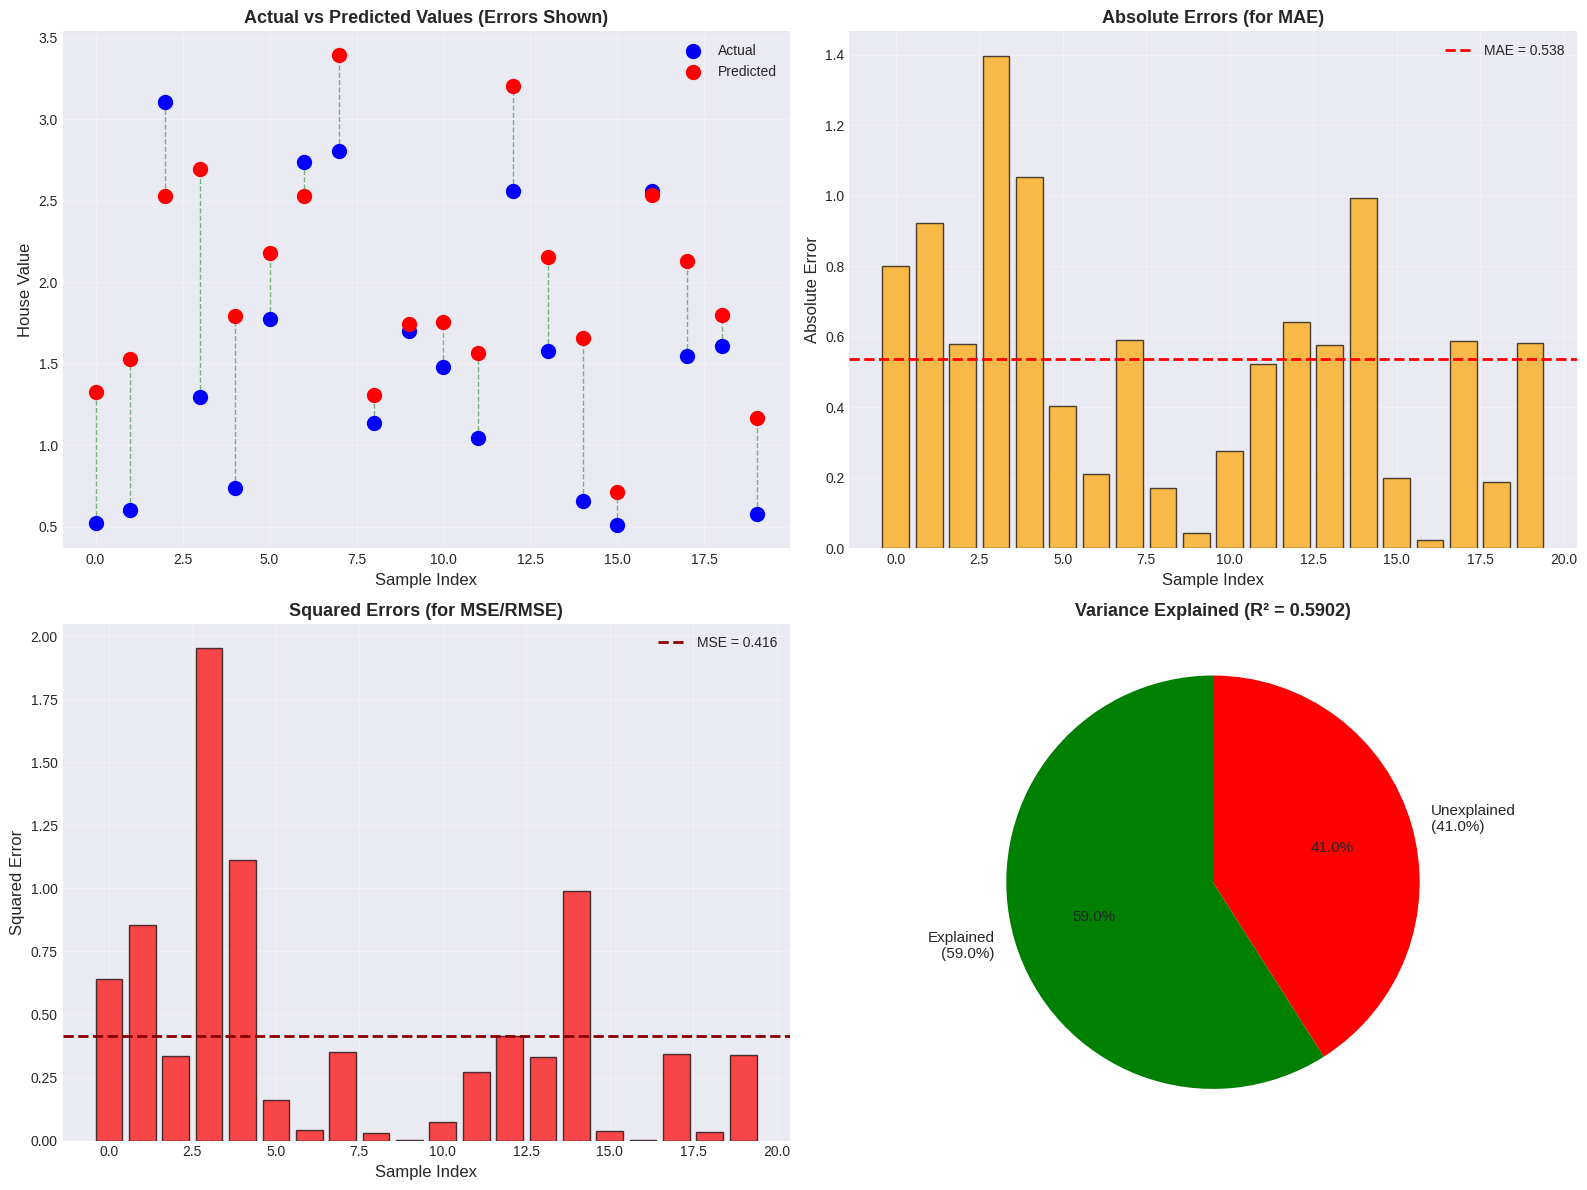

In [ ]:
# Visualize how different metrics are calculated
# Take a small sample for visualization
sample_size = 20
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
y_actual_sample = y_test.iloc[sample_indices].values
y_pred_sample = y_test_pred_multiple[sample_indices]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted with error lines
x_pos = np.arange(sample_size)
axes[0, 0].scatter(x_pos, y_actual_sample, color='blue', s=100, label='Actual', zorder=3)
axes[0, 0].scatter(x_pos, y_pred_sample, color='red', s=100, label='Predicted', zorder=3)
for i in range(sample_size):
    axes[0, 0].plot([x_pos[i], x_pos[i]], [y_actual_sample[i], y_pred_sample[i]],
                   'g--', alpha=0.5, linewidth=1)
axes[0, 0].set_xlabel('Sample Index', fontsize=12)
axes[0, 0].set_ylabel('House Value', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted Values (Errors Shown)', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Absolute Errors
abs_errors_sample = np.abs(y_actual_sample - y_pred_sample)
axes[0, 1].bar(x_pos, abs_errors_sample, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=abs_errors_sample.mean(), color='r', linestyle='--',
                   linewidth=2, label=f'MAE = {abs_errors_sample.mean():.3f}')
axes[0, 1].set_xlabel('Sample Index', fontsize=12)
axes[0, 1].set_ylabel('Absolute Error', fontsize=12)
axes[0, 1].set_title('Absolute Errors (for MAE)', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Squared Errors
squared_errors_sample = (y_actual_sample - y_pred_sample) ** 2
axes[1, 0].bar(x_pos, squared_errors_sample, color='red', alpha=0.7, edgecolor='black')
axes[1, 0].axhline(y=squared_errors_sample.mean(), color='darkred', linestyle='--',
                   linewidth=2, label=f'MSE = {squared_errors_sample.mean():.3f}')
axes[1, 0].set_xlabel('Sample Index', fontsize=12)
axes[1, 0].set_ylabel('Squared Error', fontsize=12)
axes[1, 0].set_title('Squared Errors (for MSE/RMSE)', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. R² Visualization
# Show explained vs unexplained variance
ss_total = np.sum((y_test - y_test.mean()) ** 2)
ss_residual = np.sum((y_test - y_test_pred_multiple) ** 2)
ss_explained = ss_total - ss_residual

variance_data = [ss_explained, ss_residual]
colors_var = ['green', 'red']
labels_var = [f'Explained\n({ss_explained/ss_total*100:.1f}%)',
              f'Unexplained\n({ss_residual/ss_total*100:.1f}%)']

axes[1, 1].pie(variance_data, labels=labels_var, colors=colors_var, autopct='%1.1f%%',
              startangle=90, textprops={'fontsize': 11})
axes[1, 1].set_title(f'Variance Explained (R² = {test_r2_multiple:.4f})',
                    fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


---
## 10. Summary and Conclusions


In [ ]:
print("" + "="*90)
print(" " * 25 + "TUTORIAL SUMMARY")
print("="*90 + "\n")

print("📚 WHAT WE LEARNED:")
print("-" * 90)
print("1. ✓ Data Loading & Exploration: Loaded California Housing dataset")
print("2. ✓ Data Visualization: Created comprehensive visualizations (distributions, correlations, geographic)")
print("3. ✓ Feature Engineering: Created new meaningful features from existing ones")
print("4. ✓ Simple Linear Regression: Built single-variable model")
print("5. ✓ Multiple Linear Regression: Built multi-variable model")
print("6. ✓ Model Evaluation: Calculated and interpreted MSE, RMSE, MAE, and R² metrics")
print("7. ✓ Model Comparison: Compared performance of both models")

print("\n📊 KEY RESULTS:")
print("-" * 90)
print(f"Dataset Size: {len(df):,} samples with {len(df.columns)-1} features")
print(f"\nSimple Linear Regression (using {feature_for_simple} only):")
print(f"  • RMSE: {test_rmse_simple:.4f} (≈ ${test_rmse_simple*100000:,.0f})")
print(f"  • R²: {test_r2_simple:.4f} ({test_r2_simple*100:.2f}% variance explained)")
print(f"\nMultiple Linear Regression (using {X_train_scaled.shape[1]} features):")
print(f"  • RMSE: {test_rmse_multiple:.4f} (≈ ${test_rmse_multiple*100000:,.0f})")
print(f"  • R²: {test_r2_multiple:.4f} ({test_r2_multiple*100:.2f}% variance explained)")
print(f"\nImprovement:")
print(f"  • RMSE reduced by {rmse_improvement:.2f}%")
print(f"  • R² improved by {r2_improvement:.2f}%")

print("\n💡 KEY INSIGHTS:")
print("-" * 90)
print("• Multiple Linear Regression significantly outperforms Simple Linear Regression")
print("• Median Income (MedInc) is the strongest single predictor of house prices")
print("• Feature engineering can create valuable new predictors")
print("• Geographic location (Latitude/Longitude) plays an important role in pricing")
print("• Lower RMSE and MAE indicate better prediction accuracy")
print("• Higher R² indicates the model explains more variance in the target variable")

print("\n🎯 NEXT STEPS FOR IMPROVEMENT:")
print("-" * 90)
print("1. Try polynomial features for non-linear relationships")
print("2. Experiment with regularization (Ridge, Lasso) to prevent overfitting")
print("3. Use cross-validation for more robust performance estimates")
print("4. Try advanced models (Random Forest, Gradient Boosting, Neural Networks)")
print("5. Handle outliers and feature selection more carefully")
print("6. Perform hyperparameter tuning")

print("\n" + "="*90)
print(" " * 20 + "END OF TUTORIAL - HAPPY LEARNING! 🚀")
print("="*90)


                         TUTORIAL SUMMARY

📚 WHAT WE LEARNED:
------------------------------------------------------------------------------------------
1. ✓ Data Loading & Exploration: Loaded California Housing dataset
2. ✓ Data Visualization: Created comprehensive visualizations (distributions, correlations, geographic)
3. ✓ Feature Engineering: Created new meaningful features from existing ones
4. ✓ Simple Linear Regression: Built single-variable model
5. ✓ Multiple Linear Regression: Built multi-variable model
6. ✓ Model Evaluation: Calculated and interpreted MSE, RMSE, MAE, and R² metrics
7. ✓ Model Comparison: Compared performance of both models

📊 KEY RESULTS:
------------------------------------------------------------------------------------------
Dataset Size: 20,640 samples with 6 features

Simple Linear Regression (using MedInc only):
  • RMSE: 0.8427 (≈ $84,273)
  • R²: 0.4580 (45.80% variance explained)

Multiple Linear Regression (using 9 features):
  • RMSE: 0.7328 (≈ $